__`DEEP LEARNING NEURAL NETWORKS - FALL 2023`__</br>
<br>__Image Recognition - Weather__
<br>Computer Vision Project - Convolutional Neural Networks
<br><br>**Group 5**
<br>20222142 - Francisco Loureiro
<br>20222144 - Inês Peixoto
<br>20222169 - Marco Sambento
<br>20222160 - Maria Gomes de Sousa
<br>
<hr>

__Weather - Dataset__<br>
Dataset: https://data.mendeley.com/datasets/4drtyfjtfy/1

Ajayi, Gbeminiyi (2018), “Multi-class Weather Dataset for Image Classification”, Mendeley Data, V1, doi: 10.17632/4drtyfjtfy.1
<hr>


**Table of contents**<a id='toc0_'></a>    
- 1. [Import data (Dataset Spliting)](#toc1_)    
  - 1.1. [Get unique classes from raw dataset](#toc1_1_)    
  - 1.2. [Organize the images in each set directory (train, validation, test)](#toc1_2_)    
  - 1.3. [Sets composition overview](#toc1_3_)    
- 2. [Modeling](#toc2_)    
  - 2.1. [Base Model - 1a.1 - RMSProp optimizer](#toc2_1_)    
    - 2.1.1. [Architecture of layers and hidden units](#toc2_1_1_)    
    - 2.1.2. [Training the model](#toc2_1_2_)    
    - 2.1.3. [Model results](#toc2_1_3_)    
  - 2.2. [Base Model - 1a.2 - Additional set of layers (Conv2D+Pooling).](#toc2_2_)    
    - 2.2.1. [Architecture of layers and hidden units](#toc2_2_1_)    
    - 2.2.2. [Training the model](#toc2_2_2_)    
    - 2.2.3. [Model results](#toc2_2_3_)    
  - 2.3. [Base Model - 1b - Adam optimizer.](#toc2_3_)    
    - 2.3.1. [Architecture of layers and hidden units](#toc2_3_1_)    
    - 2.3.2. [Training the model](#toc2_3_2_)    
    - 2.3.3. [Model results](#toc2_3_3_)    
  - 2.4. [Base Model - 1c - Batch size 64 (vs 32).](#toc2_4_)    
    - 2.4.1. [Architecture of layers and hidden units](#toc2_4_1_)    
    - 2.4.2. [Training the model](#toc2_4_2_)    
    - 2.4.3. [Model results](#toc2_4_3_)    
  - 2.5. [Base Model - 1d - Feature Reduction.](#toc2_5_)    
    - 2.5.1. [Architecture of layers and hidden units](#toc2_5_1_)    
    - 2.5.2. [Training the model](#toc2_5_2_)    
    - 2.5.3. [Model results](#toc2_5_3_)    
  - 2.6. [Base Model - 1e - Dynamic LR.](#toc2_6_)    
    - 2.6.1. [Architecture of layers and hidden units](#toc2_6_1_)    
    - 2.6.2. [Training the model](#toc2_6_2_)    
    - 2.6.3. [Model results](#toc2_6_3_)    
  - 2.7. [Base Model - 1f - Adjust Class Weights.](#toc2_7_)    
    - 2.7.1. [Architecture of layers and hidden units](#toc2_7_1_)    
    - 2.7.2. [Training the model](#toc2_7_2_)    
    - 2.7.3. [Model results](#toc2_7_3_)    
  - 2.8. [Base Model + Augmentation + Dropout layer.](#toc2_8_)    
    - 2.8.1. [Data Augmentation](#toc2_8_1_)    
    - 2.8.2. [Architecture of layers and hidden units](#toc2_8_2_)    
    - 2.8.3. [Training the model](#toc2_8_3_)    
    - 2.8.4. [Model results](#toc2_8_4_)    
  - 2.9. [Transfer Learning - ResNet50 Model (with added just the output layer).](#toc2_9_)    
    - 2.9.1. [Feature Extraction - Pre-trained Convolutional Layers](#toc2_9_1_)    
    - 2.9.2. [Architecture of Fully-Connected layer and Output layer.](#toc2_9_2_)    
    - 2.9.3. [Training the model](#toc2_9_3_)    
    - 2.9.4. [Model results](#toc2_9_4_)    
  - 2.10. [Transfer Learning - ResNet50 Model (with added 5 layers).](#toc2_10_)    
    - 2.10.1. [Feature Extraction - Pre-trained Convolutional Layers](#toc2_10_1_)    
    - 2.10.2. [Architecture of Fully-Connected layer and Output layer.](#toc2_10_2_)    
    - 2.10.3. [Training the model](#toc2_10_3_)    
    - 2.10.4. [Model results](#toc2_10_4_)    
  - 2.11. [Transfer Learning - VGG16 Model (with added just the output layer).](#toc2_11_)    
    - 2.11.1. [Feature Extraction - Pre-trained Convolutional Layers](#toc2_11_1_)    
    - 2.11.2. [Architecture of Fully-Connected layer and Output layer.](#toc2_11_2_)    
    - 2.11.3. [Training the model](#toc2_11_3_)    
    - 2.11.4. [Model results](#toc2_11_4_)    
  - 2.12. [Transfer Learning - VGG16 Model (with added 5 layers).](#toc2_12_)    
    - 2.12.1. [Feature Extraction - Pre-trained Convolutional Layers](#toc2_12_1_)    
    - 2.12.2. [Architecture of Fully-Connected layer and Output layer.](#toc2_12_2_)    
    - 2.12.3. [Training the model](#toc2_12_3_)    
    - 2.12.4. [Model results](#toc2_12_4_)    
- 3. [Weather Prediction](#toc3_)    
  - 3.1. [Input Samples](#toc3_1_)    
  - 3.2. [Load Models](#toc3_2_)    
  - 3.3. [Generate Predictions](#toc3_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

<hr><br>
Import all the needed libraries.

In [104]:
import os, shutil
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.saving import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, TensorBoard, CSVLogger, ReduceLROnPlateau
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.models import Model
import pandas as pd
import re 
from PIL import Image
from shutil import copyfile
from sklearn.model_selection import train_test_split


# 1.  [&#8593;](#toc0_) <a id='toc1_'></a>Import data (Dataset Spliting)

## 1.1.  [&#8593;](#toc0_) <a id='toc1_1_'></a>Get unique classes from raw dataset

Our images filenames have the following mask: [class]+[id], where [class] is the class of the image and [id] is a incremental integer. <br>Example: cloudy1.jpg, where 'cloudy' is the image class and 1 is the unique number of the image in the class.

In [105]:
def get_unique_names(folder_path):
    unique_names = set()

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Check if the file is a JPG image
        try:
            img = Image.open(file_path)
            img.close()
            if filename.lower().endswith(".jpg"):
                # Add the unique name (excluding the file extension) to the set
                unique_names.add(os.path.splitext(filename)[0])
        except (IOError, OSError):
            # Handle the case where the file is not an image or cannot be opened
            pass

    return unique_names

In [106]:
original_dataset_dir = 'D:/Datasets/weather/dataset2'
unique_names = get_unique_names(original_dataset_dir)

print("Unique names in the folder:")

unique_characters = []
for name in unique_names:
    unique_characters.append(re.sub('[0-9]', '', name))

unique_characters = list(set(unique_characters))

print(unique_characters)

Unique names in the folder:
['cloudy', 'shine', 'rain', 'sunrise']


## 1.2.  [&#8593;](#toc0_) <a id='toc1_2_'></a>Organize the images in each set directory (train, validation, test)

In [107]:
# Organize images in different folders - na pasta organized_dataset (temos de criar) vamos criar pastas 

def organize_images(source_folder, destination_folder, unique_characters):
    # Ensure the destination folder exists or create it
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    for filename in os.listdir(source_folder):
        source_path = os.path.join(source_folder, filename)
        # Check if the file is a JPG image
        try:
            img = Image.open(source_path)
            img.close()

            # Iterate over unique words
            for char in unique_characters:

                # Create a folder for each class
                class_folder = os.path.join(destination_folder, char)
                if not os.path.exists(class_folder):
                    os.makedirs(class_folder)
                    # print("class folder:", class_folder)
                    
                # Check if the word is present in the filename (e.gcloudy is in cloudy149?)
                if char in filename.lower():

                    # Copy the image to the corresponding class folder
                    destination_path = os.path.join(class_folder, filename)
                    copyfile(source_path, destination_path)
                    # print("Copying", filename, "to", class_folder)

        except (IOError, OSError):
            # Handle the case where the file is not an image or cannot be opened
            pass

In [108]:
# Replace these paths with your actual source and destination folder paths
source_folder_path = "D:/Datasets/weather/dataset2"
destination_folder_path = "D:/Datasets/weather/weather_split"

# Replace this with your list of unique characters
unique_characters = ['cloudy', 'sunrise', 'rain', 'shine']

organize_images(source_folder_path, destination_folder_path, unique_characters)

In [109]:
#So, in summary:

#70% of the images from each category are used for training (train).
#15% of the images from each category are used for validation (val).
#15% of the images from each category are used for testing (test).

# Set the path to your root folder
source_folder_path = "D:/Datasets/weather/weather_split"

# Create lists to store file paths for each category
rain_images = []
shine_images = []
sunrise_images = []
cloudy_images = []

# Iterate through each category folder
for category_folder in os.listdir(source_folder_path):
    category_path = os.path.join(source_folder_path, category_folder)
    
    # Skip non-directory entries
    if not os.path.isdir(category_path):
        continue
    
    # Get a list of file paths for each category
    image_files = [os.path.join(category_path, file) for file in os.listdir(category_path) if file.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    # Append to the respective category list
    if category_folder.lower() == 'rain':
        rain_images.extend(image_files)
    elif category_folder.lower() == 'shine':
        shine_images.extend(image_files)
    elif category_folder.lower() == 'sunrise':
        sunrise_images.extend(image_files)
    elif category_folder.lower() == 'cloudy':
        cloudy_images.extend(image_files)

# Split data into train, validation, and test sets for each category
rain_train, rain_temp = train_test_split(rain_images, test_size=0.3, random_state=42)
rain_val, rain_test = train_test_split(rain_temp, test_size=0.5, random_state=42)

shine_train, shine_temp = train_test_split(shine_images, test_size=0.3, random_state=42)
shine_val, shine_test = train_test_split(shine_temp, test_size=0.5, random_state=42)

sunrise_train, sunrise_temp = train_test_split(sunrise_images, test_size=0.3, random_state=42)
sunrise_val, sunrise_test = train_test_split(sunrise_temp, test_size=0.5, random_state=42)

cloudy_train, cloudy_temp = train_test_split(cloudy_images, test_size=0.3, random_state=42)
cloudy_val, cloudy_test = train_test_split(cloudy_temp, test_size=0.5, random_state=42)

# Define the paths for train, validation, and test sets
train_folder = os.path.join(source_folder_path, 'train')
val_folder = os.path.join(source_folder_path, 'validation')
test_folder = os.path.join(source_folder_path, 'test')

# Function to move images to the specified folder
def move_images(image_list, destination_folder):
    # Create the destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)
    
    for image_path in image_list:
        image_name = os.path.basename(image_path)
        destination_path = os.path.join(destination_folder, image_name)
        shutil.move(image_path, destination_path)

# Move images to the corresponding folders
move_images(rain_train, os.path.join(train_folder, 'rain'))
move_images(rain_val, os.path.join(val_folder, 'rain'))
move_images(rain_test, os.path.join(test_folder, 'rain'))

move_images(shine_train, os.path.join(train_folder, 'shine'))
move_images(shine_val, os.path.join(val_folder, 'shine'))
move_images(shine_test, os.path.join(test_folder, 'shine'))

move_images(sunrise_train, os.path.join(train_folder, 'sunrise'))
move_images(sunrise_val, os.path.join(val_folder, 'sunrise'))
move_images(sunrise_test, os.path.join(test_folder, 'sunrise'))

move_images(cloudy_train, os.path.join(train_folder, 'cloudy'))
move_images(cloudy_val, os.path.join(val_folder, 'cloudy'))
move_images(cloudy_test, os.path.join(test_folder, 'cloudy'))

# Remove the original folders
for u in unique_characters:
    if os.path.exists(os.path.join(source_folder_path, u)):
        shutil.rmtree(os.path.join(source_folder_path, u))

## 1.3.  [&#8593;](#toc0_) <a id='toc1_3_'></a>Sets composition overview

In [110]:
images_pd = pd.DataFrame()
images_pd["classes"] = ['cloudy', 'rain', 'shine', 'sunrise']
train_dir = os.path.join(source_folder_path, 'train')
validation_dir = os.path.join(source_folder_path, 'validation')
test_dir = os.path.join(source_folder_path, 'test')

images_pd["train"] = [
    len(os.listdir(os.path.join(train_dir, 'cloudy'))),
    len(os.listdir(os.path.join(train_dir, 'rain'))),
    len(os.listdir(os.path.join(train_dir, 'shine'))),
    len(os.listdir(os.path.join(train_dir, 'sunrise'))),
]

images_pd["validation"] = [
    len(os.listdir(os.path.join(validation_dir, 'cloudy'))),
    len(os.listdir(os.path.join(validation_dir, 'rain'))),
    len(os.listdir(os.path.join(validation_dir, 'shine'))),
    len(os.listdir(os.path.join(validation_dir, 'sunrise'))),
]
images_pd["test"] = [
    len(os.listdir(os.path.join(test_dir, 'cloudy'))),
    len(os.listdir(os.path.join(test_dir, 'rain'))),
    len(os.listdir(os.path.join(test_dir, 'shine'))),
    len(os.listdir(os.path.join(test_dir, 'sunrise'))),
]
images_pd["Total"] = images_pd["train"] + images_pd["validation"] + images_pd["test"]

images_pd.loc[len(images_pd.index)] = [
    "Total",
    images_pd["train"].sum(),
    images_pd["validation"].sum(),
    images_pd["test"].sum(),
    images_pd["Total"].sum(),
]

In [111]:
images_pd

,classes,train,validation,test,Total
0,cloudy,210,45,45,300
1,rain,150,32,33,215
2,shine,177,38,38,253
3,sunrise,249,54,54,357
4,Total,786,169,170,1125


# 2.  [&#8593;](#toc0_) <a id='toc2_'></a>Modeling

In [112]:
# Define image size and other parameters
img_size = (224, 224)
batch_size = 32

## 2.1.  [&#8593;](#toc0_) <a id='toc2_1_'></a>Base Model - 1a.1 - RMSProp optimizer

### 2.1.1.  [&#8593;](#toc0_) <a id='toc2_1_1_'></a>Architecture of layers and hidden units

`Modelo 1a.1`

In [113]:
model_id = 'model1a1'

In [114]:
# Build a simple CNN model
model1a1 = models.Sequential(name=f"Base_Model-{model_id}")
model1a1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model1a1.add(layers.MaxPooling2D((2, 2)))
model1a1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1a1.add(layers.MaxPooling2D((2, 2)))
model1a1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1a1.add(layers.MaxPooling2D((2, 2)))
model1a1.add(layers.Flatten())
model1a1.add(layers.Dense(128, activation='relu'))
model1a1.add(layers.Dense(4, activation='softmax'))  # Assuming you have 4 classes (rain, shine, sunrise, cloudy)

In [115]:
model1a1.summary()

Model: "Base_Model-model1a1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128

In [116]:
model1a1.compile(
    loss="categorical_crossentropy",
    # optimizer=optimizers.RMSprop(learning_rate=1e-4),
    # optimizer=optimizers.Adam(learning_rate=1e-4),
    optimizer='rmsprop',
    metrics=["accuracy"],
)

In [117]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 786 images belonging to 4 classes.
Found 169 images belonging to 4 classes.
Found 170 images belonging to 4 classes.


In [118]:
def callback_params(checkpoint_dir, checkpoint_file_path, logs_dir, file_history):
    # cria a pasta para guardar os logs do Tensorboard
    # pasta logs principal
    if os.path.exists('logs'):
        shutil.rmtree('logs')
    os.mkdir ('logs')
    #criar subpasta para registar o log do modelo
    if os.path.exists(logs_dir):
        shutil.rmtree(logs_dir)
    os.mkdir (logs_dir)
    
    #criar subpasta para guardar modelo
    if os.path.exists(checkpoint_dir):
        shutil.rmtree(checkpoint_dir)
    os.mkdir (checkpoint_dir)
    
    checkpoint = ModelCheckpoint(
        checkpoint_file_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max"
    )

    csv_logger = CSVLogger(file_history, separator=',', append=False)

    # early = EarlyStopping(monitor="val_acc", mode="max", patience=10)
    # reduce_on_plateau = ReduceLROnPlateau(    monitor="val_accuracy", mode="max", factor=0.1, patience=3)
    tensorboard_logs = TensorBoard(log_dir=logs_dir, histogram_freq=1)
    return checkpoint, tensorboard_logs, csv_logger

In [119]:
checkpoint_dir = f"D:/Datasets/weather/saved_models/{model_id}"
logs_dir = f"logs/{model_id}"
file_name = f"{model_id}.keras"
file_history = f"{model_id}_history.log"

checkpoint_file_path = os.path.join(checkpoint_dir, file_name)
history_file_path = os.path.join(checkpoint_dir, file_history)

### 2.1.2.  [&#8593;](#toc0_) <a id='toc2_1_2_'></a>Training the model

In [19]:
treinar = True # mudar para True para correr o modelo

if treinar:
    callbacks_list = callback_params(checkpoint_dir, checkpoint_file_path, logs_dir, history_file_path)
    
    history = model1a1.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=30, # adjust as needed (may be adjusted by callbacks)
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
        callbacks=callbacks_list,
        verbose=1,
    )
else: # carrega o historico do último treino
    history = pd.read_csv(history_file_path, sep=',', engine='python')
    print(f"Loaded saved history from {history_file_path}.")

Epoch 1/30


24/24 [==============================] - ETA: 0s - loss: 1.6043 - accuracy: 0.5239
Epoch 1: val_accuracy improved from -inf to 0.55625, saving model to D:/Datasets/weather/saved_models/model1a1\model1a1.keras
24/24 [==============================] - 47s 2s/step - loss: 1.6043 - accuracy: 0.5239 - val_loss: 0.9791 - val_accuracy: 0.5562
Epoch 2/30
24/24 [==============================] - ETA: 0s - loss: 0.6914 - accuracy: 0.7202
Epoch 2: val_accuracy improved from 0.55625 to 0.65000, saving model to D:/Datasets/weather/saved_models/model1a1\model1a1.keras
24/24 [==============================] - 47s 2s/step - loss: 0.6914 - accuracy: 0.7202 - val_loss: 1.3417 - val_accuracy: 0.6500
Epoch 3/30
24/24 [==============================] - ETA: 0s - loss: 0.5878 - accuracy: 0.7759
Epoch 3: val_accuracy did not improve from 0.65000
24/24 [==============================] - 34s 1s/step - loss: 0.5878 - accuracy: 0.7759 - val_loss: 1.1625 - val_accuracy: 0.5813
Epoch 4/30
24/24 [=====

In [120]:
def report(model, data, report_name):
    Y_pred = model.predict(data, verbose=0)
    Y_pred = np.argmax(Y_pred, axis=1)
    target_names = ["Cloudy", "Rain", "Shine", "Sunrise"]

    print("Confusion Matrix")
    print("Rows = True labels, Columns = predicted labels")
    print("")
    # print(confusion_matrix(data.classes, Y_pred))
    cm = confusion_matrix(data.classes, Y_pred)
    # cm_df = pd.DataFrame(cm, index = target_names, columns = target_names)
    # print("")
    # print(cm_df)

    # confusion matrix with tags
    multi_index = pd.MultiIndex.from_tuples(
        [
            ("", "Cloudy"),
            ("", "Rain"),
            ("", "Shine"),
            ("", "Sunrise"),
        ],
        names=["True label", "Class"],
    )

    cols = pd.MultiIndex.from_tuples(
        [
            ("Predicted", "Cloudy"),
            ("Predicted", "Rain"),
            ("Predicted", "Shine"),
            ("Predicted", "Sunrise"),
        ]
    )
    cm_df = pd.DataFrame(cm, columns=cols, index=multi_index)
    print(cm_df)
    # ConfusionMatrixDisplay(cm, display_labels=['Cloudy', 'Rain', 'Shine', 'Sunrise']).plot()
    print("")
    print(f"{report_name} Report")
    print(classification_report(data.classes, Y_pred, target_names=target_names))

In [121]:
def plot_history(history_data):

    if isinstance(history_data, pd.DataFrame):
        acc = history_data['accuracy']
        val_acc = history_data['val_accuracy']
        loss = history_data['loss']
        val_loss = history_data['val_loss']
    else:
        acc = history_data.history['accuracy']
        val_acc = history_data.history['val_accuracy']
        loss = history_data.history['loss']
        val_loss = history_data.history['val_loss']

    epochs =  range(1, len(acc) + 1)

    plt.ylim(ymin=0)
    plt.ylim(ymax=1.2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and Validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()
    plt.ylim(ymin=-0.2)
    plt.ylim(ymax=1.5)
    plt.show()

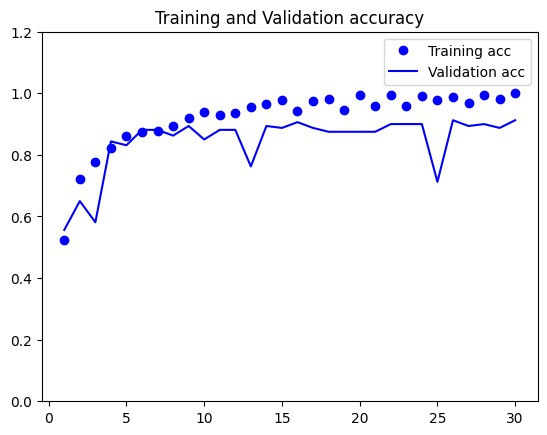

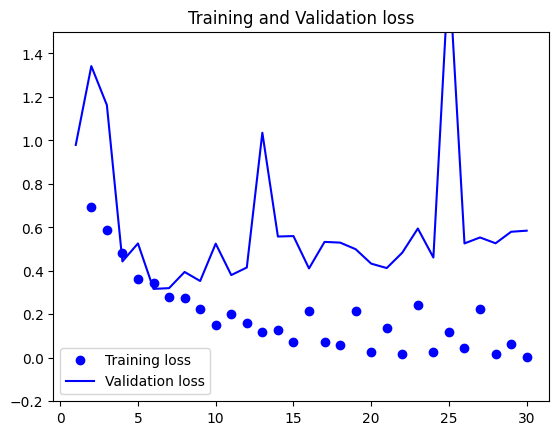

In [22]:
plot_history(history)

O modelo apresenta overfitting e instabilidade de resultados entre epochs.
Proposta de optimização:
1. Adicionar um conjunto adicional de camadas Conv2D + MaxPooling.
2. Testar com optimizer 'Adam' (vs 'RMSProp') e observar as diferenças.
3. Testar com batch size maior para mitigar a instabilidade.
4. Correção do overfitting após correção da instabilidade.

In [23]:
# The model weights (that are considered the best) can be loaded as -
model1a1.load_weights(checkpoint_file_path)

### 2.1.3.  [&#8593;](#toc0_) <a id='toc2_1_3_'></a>Model results

In [24]:
report(model1a1, train_generator, "Train")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         56   40    59      55
           Rain           43   28    38      41
           Shine          48   36    33      60
           Sunrise        63   46    47      93

Train Report
              precision    recall  f1-score   support

      Cloudy       0.27      0.27      0.27       210
        Rain       0.19      0.19      0.19       150
       Shine       0.19      0.19      0.19       177
     Sunrise       0.37      0.37      0.37       249

    accuracy                           0.27       786
   macro avg       0.25      0.25      0.25       786
weighted avg       0.27      0.27      0.27       786



In [25]:
report(model1a1, validation_generator, "Validation")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         40    2     3       0
           Rain            1   29     1       1
           Shine           3    1    34       0
           Sunrise         0    0     2      52

Validation Report
              precision    recall  f1-score   support

      Cloudy       0.91      0.89      0.90        45
        Rain       0.91      0.91      0.91        32
       Shine       0.85      0.89      0.87        38
     Sunrise       0.98      0.96      0.97        54

    accuracy                           0.92       169
   macro avg       0.91      0.91      0.91       169
weighted avg       0.92      0.92      0.92       169



In [26]:
report(model1a1, test_generator, "Test")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         39    1     5       0
           Rain            1   31     1       0
           Shine           1    2    35       0
           Sunrise         0    0     1      53

Test Report
              precision    recall  f1-score   support

      Cloudy       0.95      0.87      0.91        45
        Rain       0.91      0.94      0.93        33
       Shine       0.83      0.92      0.88        38
     Sunrise       1.00      0.98      0.99        54

    accuracy                           0.93       170
   macro avg       0.92      0.93      0.92       170
weighted avg       0.93      0.93      0.93       170



__Store the results in a Dataframe for later comparison.__

In [13]:
results_df = pd.DataFrame(columns=['Model', 'Loss Score', 'Accuracy Score'])

In [28]:
results_loss, results_acc = model1a1.evaluate(test_generator)

results_df.loc[len(results_df.index)] = [
    f"Base Model-{model_id}",
    results_loss,
    results_acc,
]
results_df

6/6 [==============================] - 1s 178ms/step - loss: 0.2168 - accuracy: 0.9294


,Model,Loss Score,Accuracy Score
0,Base Model-model1a1,0.216845,0.929412


## 2.2.  [&#8593;](#toc0_) <a id='toc2_2_'></a>Base Model - 1a.2 - Additional set of layers (Conv2D+Pooling).

### 2.2.1.  [&#8593;](#toc0_) <a id='toc2_2_1_'></a>Architecture of layers and hidden units

`Modelo 1a.2`

- Adicionar um conjunto de 2 layers Conv2D + MaxPooling.

In [29]:
model_id = 'model1a2-Add_Conv2d_MaxPooling'

In [30]:
# Build a simple CNN model
model1a2 = models.Sequential(name=f"Base_Model-{model_id}")
model1a2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model1a2.add(layers.MaxPooling2D((2, 2)))
model1a2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1a2.add(layers.MaxPooling2D((2, 2)))
model1a2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1a2.add(layers.MaxPooling2D((2, 2)))
model1a2.add(layers.Conv2D(128, (3, 3), activation='relu')) # Additional layer
model1a2.add(layers.MaxPooling2D((2, 2))) # Additional layer
model1a2.add(layers.Flatten())
model1a2.add(layers.Dense(128, activation='relu'))
model1a2.add(layers.Dense(4, activation='softmax'))  # Assuming you have 4 classes (rain, shine, sunrise, cloudy)

In [31]:
model1a2.summary()

Model: "Base_Model-model1a2-Add_Conv2d_MaxPooling"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPool

In [32]:
model1a2.compile(
    loss="categorical_crossentropy",
    # optimizer=optimizers.RMSprop(learning_rate=1e-4),
    # optimizer=optimizers.Adam(learning_rate=1e-4),
    optimizer='rmsprop',
    metrics=["accuracy"],
)

In [33]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 786 images belonging to 4 classes.
Found 169 images belonging to 4 classes.
Found 170 images belonging to 4 classes.


In [34]:
checkpoint_dir = f"D:/Datasets/weather/saved_models/{model_id}"
logs_dir = f"logs/{model_id}"
file_name = f"{model_id}.keras"
file_history = f"{model_id}_history.log"

checkpoint_file_path = os.path.join(checkpoint_dir, file_name)
history_file_path = os.path.join(checkpoint_dir, file_history)

### 2.2.2.  [&#8593;](#toc0_) <a id='toc2_2_2_'></a>Training the model

In [35]:
treinar = True # mudar para True para correr o modelo

if treinar:
    callbacks_list = callback_params(checkpoint_dir, checkpoint_file_path, logs_dir, history_file_path)
    
    history = model1a2.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=30, # adjust as needed (may be adjusted by callbacks)
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
        callbacks=callbacks_list,
        verbose=1,
    )
else: # carrega o historico do último treino
    history = pd.read_csv(history_file_path, sep=',', engine='python')
    print(f"Loaded saved history from {history_file_path}.")

Epoch 1/30


24/24 [==============================] - ETA: 0s - loss: 1.3740 - accuracy: 0.4557
Epoch 1: val_accuracy improved from -inf to 0.57500, saving model to D:/Datasets/weather/saved_models/model1a2-Add_Conv2d_MaxPooling\model1a2-Add_Conv2d_MaxPooling.keras
24/24 [==============================] - 33s 1s/step - loss: 1.3740 - accuracy: 0.4557 - val_loss: 0.8874 - val_accuracy: 0.5750
Epoch 2/30
24/24 [==============================] - ETA: 0s - loss: 0.8171 - accuracy: 0.6313
Epoch 2: val_accuracy improved from 0.57500 to 0.78750, saving model to D:/Datasets/weather/saved_models/model1a2-Add_Conv2d_MaxPooling\model1a2-Add_Conv2d_MaxPooling.keras
24/24 [==============================] - 26s 1s/step - loss: 0.8171 - accuracy: 0.6313 - val_loss: 0.7234 - val_accuracy: 0.7875
Epoch 3/30
24/24 [==============================] - ETA: 0s - loss: 0.6704 - accuracy: 0.7387
Epoch 3: val_accuracy did not improve from 0.78750
24/24 [==============================] - 26s 1s/step - loss: 0.6704 - accurac

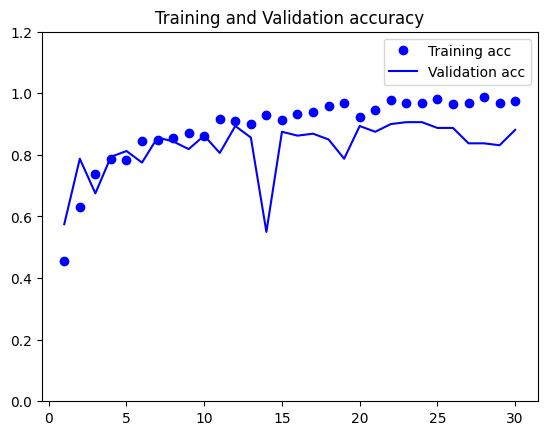

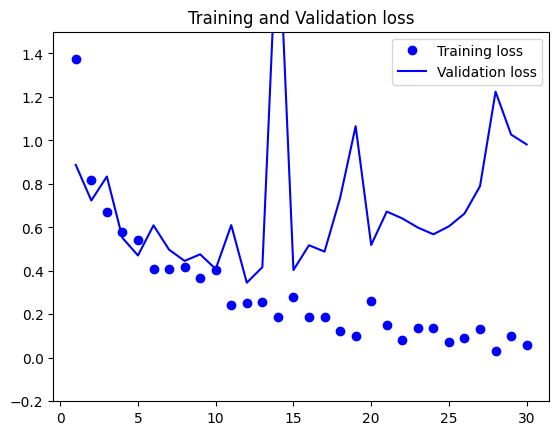

In [36]:
plot_history(history)

In [37]:
# The model weights (that are considered the best) can be loaded as -
model1a2.load_weights(checkpoint_file_path)

### 2.2.3.  [&#8593;](#toc0_) <a id='toc2_2_3_'></a>Model results

In [38]:
report(model1a2, train_generator, "Train")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         49   47    47      67
           Rain           44   28    31      47
           Shine          46   25    49      57
           Sunrise        73   48    50      78

Train Report
              precision    recall  f1-score   support

      Cloudy       0.23      0.23      0.23       210
        Rain       0.19      0.19      0.19       150
       Shine       0.28      0.28      0.28       177
     Sunrise       0.31      0.31      0.31       249

    accuracy                           0.26       786
   macro avg       0.25      0.25      0.25       786
weighted avg       0.26      0.26      0.26       786



In [39]:
report(model1a2, validation_generator, "Validation")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         41    1     3       0
           Rain            2   30     0       0
           Shine           6    1    31       0
           Sunrise         0    1     1      52

Validation Report
              precision    recall  f1-score   support

      Cloudy       0.84      0.91      0.87        45
        Rain       0.91      0.94      0.92        32
       Shine       0.89      0.82      0.85        38
     Sunrise       1.00      0.96      0.98        54

    accuracy                           0.91       169
   macro avg       0.91      0.91      0.91       169
weighted avg       0.91      0.91      0.91       169



In [40]:
report(model1a2, test_generator, "Test")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         41    0     4       0
           Rain            1   31     1       0
           Shine           4    3    31       0
           Sunrise         0    0     1      53

Test Report
              precision    recall  f1-score   support

      Cloudy       0.89      0.91      0.90        45
        Rain       0.91      0.94      0.93        33
       Shine       0.84      0.82      0.83        38
     Sunrise       1.00      0.98      0.99        54

    accuracy                           0.92       170
   macro avg       0.91      0.91      0.91       170
weighted avg       0.92      0.92      0.92       170



__Add the scores to the model results.__

In [41]:
results_loss, results_acc = model1a2.evaluate(test_generator)

results_df.loc[len(results_df.index)] = [
    F"Base Model-{model_id}",
    results_loss,
    results_acc,
]

results_df

6/6 [==============================] - 1s 189ms/step - loss: 0.2887 - accuracy: 0.9176


,Model,Loss Score,Accuracy Score
0,Base Model-model1a1,0.216845,0.929412
1,Base Model-model1a2-Add_Conv2d_MaxPooling,0.288702,0.917647


Adicionando uma Convolutional layer e uma MaxPooling à arquitetura base não se observam melhorias nos resultados (nem nos scores nem nas curvas de aprendizagem).
Vamos manter a arquitetura base para os próximos testes.

## 2.3.  [&#8593;](#toc0_) <a id='toc2_3_'></a>Base Model - 1b - Adam optimizer.

### 2.3.1.  [&#8593;](#toc0_) <a id='toc2_3_1_'></a>Architecture of layers and hidden units

`Modelo 1b`

- Change optimizer to 'Adam' (default learning rate)

In [42]:
model_id = 'model1b-Adam'

In [43]:
# Build a simple CNN model
model1b = models.Sequential(name=f"Base_Model-{model_id}")
model1b.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model1b.add(layers.MaxPooling2D((2, 2)))
model1b.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1b.add(layers.MaxPooling2D((2, 2)))
model1b.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1b.add(layers.MaxPooling2D((2, 2)))
model1b.add(layers.Flatten())
model1b.add(layers.Dense(128, activation='relu'))
model1b.add(layers.Dense(4, activation='softmax'))  # Assuming you have 4 classes (rain, shine, sunrise, cloudy)

In [44]:
model1b.summary()

Model: "Base_Model-model1b-Adam"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 26, 26,

In [45]:
model1b.compile(
    loss="categorical_crossentropy",
    # optimizer=optimizers.RMSprop(learning_rate=1e-4),
    # optimizer=optimizers.Adam(learning_rate=1e-4),
    optimizer='adam',
    metrics=["accuracy"],
)

In [46]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 786 images belonging to 4 classes.
Found 169 images belonging to 4 classes.
Found 170 images belonging to 4 classes.


In [47]:
checkpoint_dir = f"D:/Datasets/weather/saved_models/{model_id}"
logs_dir = f"logs/{model_id}"
file_name = f"{model_id}.keras"
file_history = f"{model_id}_history.log"

checkpoint_file_path = os.path.join(checkpoint_dir, file_name)
history_file_path = os.path.join(checkpoint_dir, file_history)

### 2.3.2.  [&#8593;](#toc0_) <a id='toc2_3_2_'></a>Training the model

In [48]:
treinar = True # mudar para True para correr o modelo

if treinar:
    callbacks_list = callback_params(checkpoint_dir, checkpoint_file_path, logs_dir, history_file_path)
    
    history = model1b.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=30, # adjust as needed (may be adjusted by callbacks)
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
        callbacks=callbacks_list,
        verbose=1,
    )
else: # carrega o historico do último treino
    history = pd.read_csv(history_file_path, sep=',', engine='python')
    print(f"Loaded saved history from {history_file_path}.")

Epoch 1/30
24/24 [==============================] - ETA: 0s - loss: 1.2913 - accuracy: 0.5809
Epoch 1: val_accuracy improved from -inf to 0.80625, saving model to D:/Datasets/weather/saved_models/model1b-Adam\model1b-Adam.keras
24/24 [==============================] - 45s 2s/step - loss: 1.2913 - accuracy: 0.5809 - val_loss: 0.5959 - val_accuracy: 0.8062
Epoch 2/30
24/24 [==============================] - ETA: 0s - loss: 0.5211 - accuracy: 0.8382
Epoch 2: val_accuracy improved from 0.80625 to 0.81250, saving model to D:/Datasets/weather/saved_models/model1b-Adam\model1b-Adam.keras
24/24 [==============================] - 31s 1s/step - loss: 0.5211 - accuracy: 0.8382 - val_loss: 0.5232 - val_accuracy: 0.8125
Epoch 3/30
24/24 [==============================] - ETA: 0s - loss: 0.3930 - accuracy: 0.8581
Epoch 3: val_accuracy improved from 0.81250 to 0.85625, saving model to D:/Datasets/weather/saved_models/model1b-Adam\model1b-Adam.keras
24/24 [==============================] - 31s 1s/step

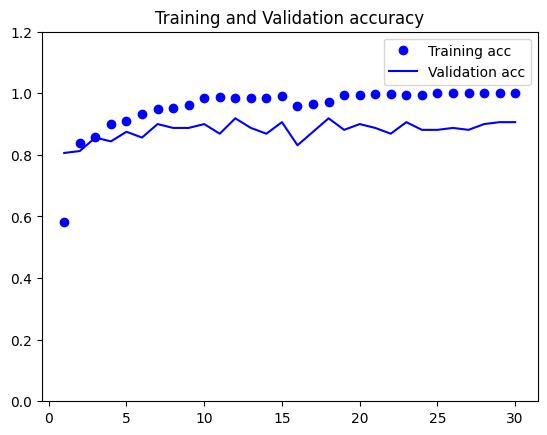

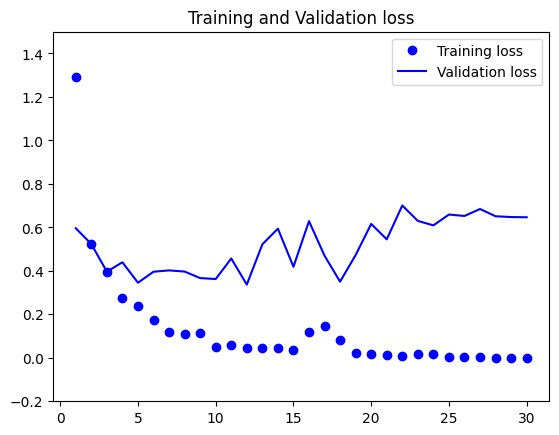

In [49]:
plot_history(history)

Com o optimizer Adam, observa-se uma redução da instabilidade nas curvas de accuracy e loss. <br>
Contudo, observa-se um ligeiro aumento do overfitting.

In [50]:
# The model weights (that are considered the best) can be loaded as -
model1b.load_weights(checkpoint_file_path)

### 2.3.3.  [&#8593;](#toc0_) <a id='toc2_3_3_'></a>Model results

In [51]:
report(model1b, train_generator, "Train")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         52   41    46      71
           Rain           44   25    40      41
           Shine          43   45    35      54
           Sunrise        72   38    56      83

Train Report
              precision    recall  f1-score   support

      Cloudy       0.25      0.25      0.25       210
        Rain       0.17      0.17      0.17       150
       Shine       0.20      0.20      0.20       177
     Sunrise       0.33      0.33      0.33       249

    accuracy                           0.25       786
   macro avg       0.24      0.24      0.24       786
weighted avg       0.25      0.25      0.25       786



In [52]:
report(model1b, validation_generator, "Validation")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         42    0     3       0
           Rain            2   29     1       0
           Shine           4    0    33       1
           Sunrise         0    0     2      52

Validation Report
              precision    recall  f1-score   support

      Cloudy       0.88      0.93      0.90        45
        Rain       1.00      0.91      0.95        32
       Shine       0.85      0.87      0.86        38
     Sunrise       0.98      0.96      0.97        54

    accuracy                           0.92       169
   macro avg       0.93      0.92      0.92       169
weighted avg       0.93      0.92      0.92       169



In [53]:
report(model1b, test_generator, "Test")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         42    0     3       0
           Rain            3   28     2       0
           Shine           3    0    34       1
           Sunrise         0    0     2      52

Test Report
              precision    recall  f1-score   support

      Cloudy       0.88      0.93      0.90        45
        Rain       1.00      0.85      0.92        33
       Shine       0.83      0.89      0.86        38
     Sunrise       0.98      0.96      0.97        54

    accuracy                           0.92       170
   macro avg       0.92      0.91      0.91       170
weighted avg       0.92      0.92      0.92       170



__Add the scores to the model results.__

In [54]:
results_loss, results_acc = model1b.evaluate(test_generator)

results_df.loc[len(results_df.index)] = [
    F"Base Model-{model_id}",
    results_loss,
    results_acc,
]

results_df

6/6 [==============================] - 1s 183ms/step - loss: 0.2350 - accuracy: 0.9176


,Model,Loss Score,Accuracy Score
0,Base Model-model1a1,0.216845,0.929412
1,Base Model-model1a2-Add_Conv2d_MaxPooling,0.288702,0.917647
2,Base Model-model1b-Adam,0.234989,0.917647


Com o optimizer Adam, o Accuracy Score é ligeiramente inferior ao RMSProp e o loss score é superior. <br>
Considerando a melhoria no comportamento das curvas de aprendizagem vamos optar pelo optimizer Adam.

## 2.4.  [&#8593;](#toc0_) <a id='toc2_4_'></a>Base Model - 1c - Batch size 64 (vs 32).

### 2.4.1.  [&#8593;](#toc0_) <a id='toc2_4_1_'></a>Architecture of layers and hidden units

`Modelo 1c`

- Utilizar o optimizer Adam (default learning rate)
- Suavidade curvas - Aumentar tamanho do batch size - 64 (vs 32) para tentar melhorar ainda mais a suavidade das curvas.

In [55]:
model_id = 'model1c-Batch_size_64'

In [14]:
batch_size = 64

In [57]:
# Build a simple CNN model
model1c = models.Sequential(name=f"Base_Model-{model_id}")
model1c.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model1c.add(layers.MaxPooling2D((2, 2)))
model1c.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1c.add(layers.MaxPooling2D((2, 2)))
model1c.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1c.add(layers.MaxPooling2D((2, 2)))
model1c.add(layers.Flatten())
model1c.add(layers.Dense(128, activation='relu'))
model1c.add(layers.Dense(4, activation='softmax'))  # Assuming you have 4 classes (rain, shine, sunrise, cloudy)

In [58]:
model1c.summary()

Model: "Base_Model-model1c-Batch_size_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPooli  (None

In [59]:
model1c.compile(
    loss="categorical_crossentropy",
    # optimizer=optimizers.RMSprop(learning_rate=1e-4),
    # optimizer=optimizers.Adam(learning_rate=1e-4),
    optimizer='adam',
    metrics=["accuracy"],
)

In [60]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 786 images belonging to 4 classes.
Found 169 images belonging to 4 classes.
Found 170 images belonging to 4 classes.


In [61]:
checkpoint_dir = f"D:/Datasets/weather/saved_models/{model_id}"
logs_dir = f"logs/{model_id}"
file_name = f"{model_id}.keras"
file_history = f"{model_id}_history.log"

checkpoint_file_path = os.path.join(checkpoint_dir, file_name)
history_file_path = os.path.join(checkpoint_dir, file_history)

### 2.4.2.  [&#8593;](#toc0_) <a id='toc2_4_2_'></a>Training the model

In [62]:
treinar = True # mudar para True para correr o modelo

if treinar:
    callbacks_list = callback_params(checkpoint_dir, checkpoint_file_path, logs_dir, history_file_path)
    
    history = model1c.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=30, # adjust as needed (may be adjusted by callbacks)
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
        callbacks=callbacks_list,
        verbose=1,
    )
else: # carrega o historico do último treino
    history = pd.read_csv(history_file_path, sep=',', engine='python')
    print(f"Loaded saved history from {history_file_path}.")

Epoch 1/30


12/12 [==============================] - ETA: 0s - loss: 1.6383 - accuracy: 0.4765
Epoch 1: val_accuracy improved from -inf to 0.64844, saving model to D:/Datasets/weather/saved_models/model1c-Batch_size_64\model1c-Batch_size_64.keras
12/12 [==============================] - 35s 3s/step - loss: 1.6383 - accuracy: 0.4765 - val_loss: 0.8844 - val_accuracy: 0.6484
Epoch 2/30
12/12 [==============================] - ETA: 0s - loss: 0.6372 - accuracy: 0.7922
Epoch 2: val_accuracy improved from 0.64844 to 0.72656, saving model to D:/Datasets/weather/saved_models/model1c-Batch_size_64\model1c-Batch_size_64.keras
12/12 [==============================] - 32s 2s/step - loss: 0.6372 - accuracy: 0.7922 - val_loss: 0.7030 - val_accuracy: 0.7266
Epoch 3/30
12/12 [==============================] - ETA: 0s - loss: 0.4973 - accuracy: 0.8255
Epoch 3: val_accuracy did not improve from 0.72656
12/12 [==============================] - 30s 2s/step - loss: 0.4973 - accuracy: 0.8255 - val_loss: 0.5937 - val_a

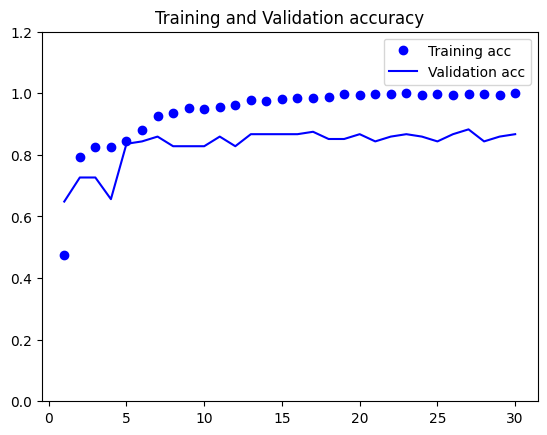

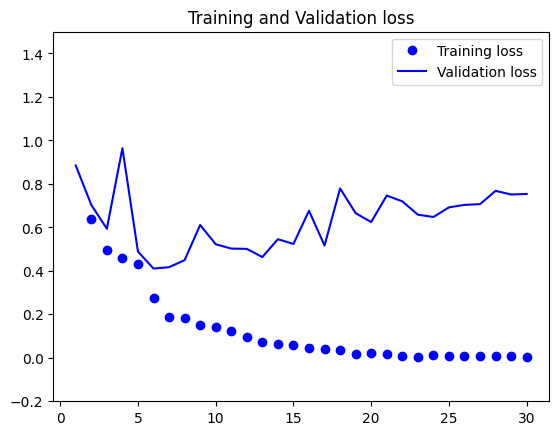

In [63]:
plot_history(history)

In [64]:
# The model weights (that are considered the best) can be loaded as -
model1c.load_weights(checkpoint_file_path)

### 2.4.3.  [&#8593;](#toc0_) <a id='toc2_4_3_'></a>Model results

In [65]:
report(model1c, train_generator, "Train")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         51   36    49      74
           Rain           47   23    39      41
           Shine          44   37    43      53
           Sunrise        68   54    46      81

Train Report
              precision    recall  f1-score   support

      Cloudy       0.24      0.24      0.24       210
        Rain       0.15      0.15      0.15       150
       Shine       0.24      0.24      0.24       177
     Sunrise       0.33      0.33      0.33       249

    accuracy                           0.25       786
   macro avg       0.24      0.24      0.24       786
weighted avg       0.25      0.25      0.25       786



In [66]:
report(model1c, validation_generator, "Validation")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         40    2     3       0
           Rain            2   30     0       0
           Shine           5    1    32       0
           Sunrise         0    1     1      52

Validation Report
              precision    recall  f1-score   support

      Cloudy       0.85      0.89      0.87        45
        Rain       0.88      0.94      0.91        32
       Shine       0.89      0.84      0.86        38
     Sunrise       1.00      0.96      0.98        54

    accuracy                           0.91       169
   macro avg       0.91      0.91      0.91       169
weighted avg       0.91      0.91      0.91       169



In [67]:
report(model1c, test_generator, "Test")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         41    0     4       0
           Rain            2   30     1       0
           Shine           2    3    33       0
           Sunrise         0    0     1      53

Test Report
              precision    recall  f1-score   support

      Cloudy       0.91      0.91      0.91        45
        Rain       0.91      0.91      0.91        33
       Shine       0.85      0.87      0.86        38
     Sunrise       1.00      0.98      0.99        54

    accuracy                           0.92       170
   macro avg       0.92      0.92      0.92       170
weighted avg       0.92      0.92      0.92       170



__Add the scores to the model results.__

In [68]:
results_loss, results_acc = model1c.evaluate(test_generator)

results_df.loc[len(results_df.index)] = [
    F"Base Model-{model_id}",
    results_loss,
    results_acc,
]
results_df

3/3 [==============================] - 1s 375ms/step - loss: 0.4335 - accuracy: 0.9235


,Model,Loss Score,Accuracy Score
0,Base Model-model1a1,0.216845,0.929412
1,Base Model-model1a2-Add_Conv2d_MaxPooling,0.288702,0.917647
2,Base Model-model1b-Adam,0.234989,0.917647
3,Base Model-model1c-Batch_size_64,0.433534,0.923529


Utilizando um batch_size maior (64 vs 32) introduz maior suavidade nas curvas de aprendizagem (ver plot history). <br>
Existe ainda uma ligeira redução do overfitting (loss curve).<br>
O accuracy score tem uma melhoria de 91,7% para 92,3%.
Vamos manter este batch size e tentar optimizar o modelo, reduzindo o overfitting que ainda permanece.

## 2.5.  [&#8593;](#toc0_) <a id='toc2_5_'></a>Base Model - 1d - Feature Reduction.

### 2.5.1.  [&#8593;](#toc0_) <a id='toc2_5_1_'></a>Architecture of layers and hidden units

`Modelo 1d`

- Utilizar o optimizer Adam (default learning rate)
- Suavidade curvas - Aumentar tamanho do batch size - 64 (vs 32)
- Overfitting - redução de complexidade do modelo - redução de n.º de filtros em 50%

In [69]:
model_id = 'model1d-feature_reduction'

In [70]:
batch_size = 64

In [71]:
# Build a simple CNN model
model1d = models.Sequential(name=f"Base_Model-{model_id}")
model1d.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model1d.add(layers.MaxPooling2D((2, 2)))
model1d.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1d.add(layers.MaxPooling2D((2, 2)))
model1d.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1d.add(layers.MaxPooling2D((2, 2)))
model1d.add(layers.Flatten())
model1d.add(layers.Dense(64, activation='relu'))
model1d.add(layers.Dense(4, activation='softmax'))  # Assuming you have 4 classes (rain, shine, sunrise, cloudy)

In [72]:
model1d.summary()

Model: "Base_Model-model1d-feature_reduction"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 111, 111, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (

In [73]:
model1d.compile(
    loss="categorical_crossentropy",
    # optimizer=optimizers.RMSprop(learning_rate=1e-4),
    # optimizer=optimizers.Adam(learning_rate=1e-4),
    optimizer='adam',
    metrics=["accuracy"],
)

In [74]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 786 images belonging to 4 classes.
Found 169 images belonging to 4 classes.
Found 170 images belonging to 4 classes.


In [75]:
checkpoint_dir = f"D:/Datasets/weather/saved_models/{model_id}"
logs_dir = f"logs/{model_id}"
file_name = f"{model_id}.keras"
file_history = f"{model_id}_history.log"

checkpoint_file_path = os.path.join(checkpoint_dir, file_name)
history_file_path = os.path.join(checkpoint_dir, file_history)

### 2.5.2.  [&#8593;](#toc0_) <a id='toc2_5_2_'></a>Training the model

In [76]:
treinar = True # mudar para True para correr o modelo

if treinar:
    callbacks_list = callback_params(checkpoint_dir, checkpoint_file_path, logs_dir, history_file_path)
    
    history = model1d.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=30, # adjust as needed (may be adjusted by callbacks)
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
        callbacks=callbacks_list,
        verbose=1,
    )
else: # carrega o historico do último treino
    history = pd.read_csv(history_file_path, sep=',', engine='python')
    print(f"Loaded saved history from {history_file_path}.")

Epoch 1/30
 2/12 [====>.........................] - ETA: 2s - loss: 1.4226 - accuracy: 0.2683 

12/12 [==============================] - ETA: 0s - loss: 1.1359 - accuracy: 0.5485
Epoch 1: val_accuracy improved from -inf to 0.52344, saving model to D:/Datasets/weather/saved_models/model1d-feature_reduction\model1d-feature_reduction.keras
12/12 [==============================] - 12s 851ms/step - loss: 1.1359 - accuracy: 0.5485 - val_loss: 1.0509 - val_accuracy: 0.5234
Epoch 2/30
12/12 [==============================] - ETA: 0s - loss: 0.6411 - accuracy: 0.7521
Epoch 2: val_accuracy improved from 0.52344 to 0.81250, saving model to D:/Datasets/weather/saved_models/model1d-feature_reduction\model1d-feature_reduction.keras
12/12 [==============================] - 10s 868ms/step - loss: 0.6411 - accuracy: 0.7521 - val_loss: 0.5844 - val_accuracy: 0.8125
Epoch 3/30
12/12 [==============================] - ETA: 0s - loss: 0.4706 - accuracy: 0.8241
Epoch 3: val_accuracy did not improve from 0.81250
12/12 [==============================] - 10s 828ms/step - loss: 0.4706 - accuracy: 0.8241 -

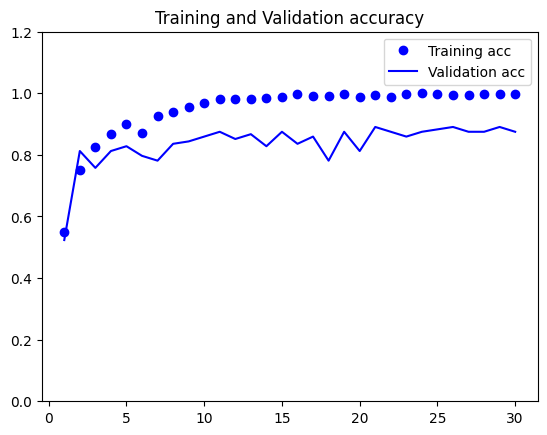

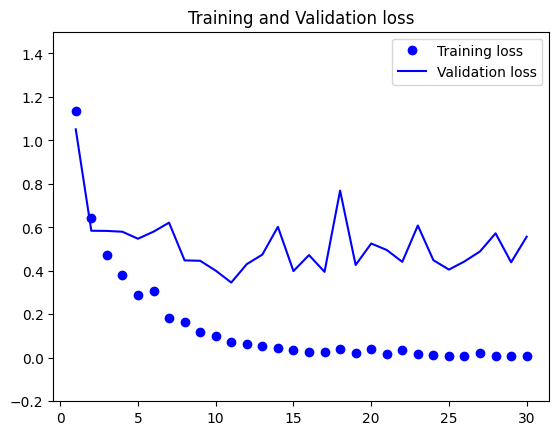

In [77]:
plot_history(history)

In [78]:
# The model weights (that are considered the best) can be loaded as -
model1d.load_weights(checkpoint_file_path)

### 2.5.3.  [&#8593;](#toc0_) <a id='toc2_5_3_'></a>Model results

In [79]:
report(model1d, train_generator, "Train")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         51   38    43      78
           Rain           47   25    36      42
           Shine          46   41    43      47
           Sunrise        68   44    55      82

Train Report
              precision    recall  f1-score   support

      Cloudy       0.24      0.24      0.24       210
        Rain       0.17      0.17      0.17       150
       Shine       0.24      0.24      0.24       177
     Sunrise       0.33      0.33      0.33       249

    accuracy                           0.26       786
   macro avg       0.25      0.25      0.25       786
weighted avg       0.26      0.26      0.26       786



In [80]:
report(model1d, validation_generator, "Validation")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         42    0     3       0
           Rain            3   28     0       1
           Shine           3    1    34       0
           Sunrise         0    0     3      51

Validation Report
              precision    recall  f1-score   support

      Cloudy       0.88      0.93      0.90        45
        Rain       0.97      0.88      0.92        32
       Shine       0.85      0.89      0.87        38
     Sunrise       0.98      0.94      0.96        54

    accuracy                           0.92       169
   macro avg       0.92      0.91      0.91       169
weighted avg       0.92      0.92      0.92       169



In [81]:
report(model1d, test_generator, "Test")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         40    0     5       0
           Rain            2   29     2       0
           Shine           1    1    36       0
           Sunrise         0    0     3      51

Test Report
              precision    recall  f1-score   support

      Cloudy       0.93      0.89      0.91        45
        Rain       0.97      0.88      0.92        33
       Shine       0.78      0.95      0.86        38
     Sunrise       1.00      0.94      0.97        54

    accuracy                           0.92       170
   macro avg       0.92      0.91      0.91       170
weighted avg       0.93      0.92      0.92       170



__Add the scores to the model results.__

In [82]:
results_loss, results_acc = model1d.evaluate(test_generator)

results_df.loc[len(results_df.index)] = [
    F"Base Model-{model_id}",
    results_loss,
    results_acc,
]
results_df

3/3 [==============================] - 1s 200ms/step - loss: 0.3368 - accuracy: 0.9176


,Model,Loss Score,Accuracy Score
0,Base Model-model1a1,0.216845,0.929412
1,Base Model-model1a2-Add_Conv2d_MaxPooling,0.288702,0.917647
2,Base Model-model1b-Adam,0.234989,0.917647
3,Base Model-model1c-Batch_size_64,0.433534,0.923529
4,Base Model-model1d-feature_reduction,0.336842,0.917647


Utilizando uma arquitetura mais simpes - mesma arquitectura, mas com redução das features em 50%, observam-se melhorias no overfitting mantendo-se praticamente iguais as curvas de aprendizagem (ou seja, não é melhorada a suavidade das curvas).
Contudo, observa-se uma ligeira degradação do accuracy score de 92,3% para 91,7% e uma melhoria do loss score.

Vamos manter esta configuração e introduzir um learning rate dinâmico no próximo cenário de teste.

## 2.6.  [&#8593;](#toc0_) <a id='toc2_6_'></a>Base Model - 1e - Dynamic LR.

### 2.6.1.  [&#8593;](#toc0_) <a id='toc2_6_1_'></a>Architecture of layers and hidden units

`Modelo 1e`

- Utilizar o optimizer Adam (default learning rate)
- Suavidade curvas - Aumentar tamanho do batch size - 64 (vs 32)
- Overfitting - redução de complexidade do modelo - redução de n.º de filtros em 50%
- Overfitting - Ajustamento dinâmico do learning rate (via callbacks)

Alterar a função de callbacks para incluir 'ReduceLROnPlateau' na lista.

In [122]:
def callback_params(checkpoint_dir, checkpoint_file_path, logs_dir, file_history):
    # cria a pasta para guardar os logs do Tensorboard
    # pasta logs principal
    if os.path.exists('logs'):
        shutil.rmtree('logs')
    os.mkdir ('logs')
    #criar subpasta para registar o log do modelo
    if os.path.exists(logs_dir):
        shutil.rmtree(logs_dir)
    os.mkdir (logs_dir)
    
    #criar subpasta para guardar modelo
    if os.path.exists(checkpoint_dir):
        shutil.rmtree(checkpoint_dir)
    os.mkdir (checkpoint_dir)
    
    checkpoint = ModelCheckpoint(
        checkpoint_file_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max"
    )

    csv_logger = CSVLogger(file_history, separator=',', append=False)

    # early = EarlyStopping(monitor="val_acc", mode="max", patience=10)
    reduce_on_plateau = ReduceLROnPlateau(monitor="val_accuracy", mode="max", factor=0.1, patience=3)
    tensorboard_logs = TensorBoard(log_dir=logs_dir, histogram_freq=1)
    return checkpoint, tensorboard_logs, csv_logger, reduce_on_plateau

In [84]:
model_id = 'model1e-reduceLR'

In [123]:
batch_size = 64

In [86]:
# Build a simple CNN model
model1e = models.Sequential(name=f"Base_Model-{model_id}")
model1e.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model1e.add(layers.MaxPooling2D((2, 2)))
model1e.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1e.add(layers.MaxPooling2D((2, 2)))
model1e.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1e.add(layers.MaxPooling2D((2, 2)))
model1e.add(layers.Flatten())
model1e.add(layers.Dense(64, activation='relu'))
model1e.add(layers.Dense(4, activation='softmax'))  # Assuming you have 4 classes (rain, shine, sunrise, cloudy)

In [87]:
model1e.summary()

Model: "Base_Model-model1e-reduceLR"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 111, 111, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 26,

In [88]:
model1e.compile(
    loss="categorical_crossentropy",
    # optimizer=optimizers.RMSprop(learning_rate=1e-4),
    # optimizer=optimizers.Adam(learning_rate=1e-4),
    optimizer='adam',
    metrics=["accuracy"],
)

In [89]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 786 images belonging to 4 classes.
Found 169 images belonging to 4 classes.
Found 170 images belonging to 4 classes.


In [90]:
checkpoint_dir = f"D:/Datasets/weather/saved_models/{model_id}"
logs_dir = f"logs/{model_id}"
file_name = f"{model_id}.keras"
file_history = f"{model_id}_history.log"

checkpoint_file_path = os.path.join(checkpoint_dir, file_name)
history_file_path = os.path.join(checkpoint_dir, file_history)

### 2.6.2.  [&#8593;](#toc0_) <a id='toc2_6_2_'></a>Training the model

In [91]:
treinar = True # mudar para True para correr o modelo

if treinar:
    callbacks_list = callback_params(checkpoint_dir, checkpoint_file_path, logs_dir, history_file_path)
    
    history = model1e.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=30, # adjust as needed (may be adjusted by callbacks)
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
        callbacks=callbacks_list,
        verbose=1,
    )
else: # carrega o historico do último treino
    history = pd.read_csv(history_file_path, sep=',', engine='python')
    print(f"Loaded saved history from {history_file_path}.")

Epoch 1/30
 3/12 [======>.......................] - ETA: 6s - loss: 2.8088 - accuracy: 0.3021

12/12 [==============================] - ETA: 0s - loss: 1.6924 - accuracy: 0.4072
Epoch 1: val_accuracy improved from -inf to 0.39062, saving model to D:/Datasets/weather/saved_models/model1e-reduceLR\model1e-reduceLR.keras
12/12 [==============================] - 9s 660ms/step - loss: 1.6924 - accuracy: 0.4072 - val_loss: 1.1758 - val_accuracy: 0.3906 - lr: 0.0010
Epoch 2/30
12/12 [==============================] - ETA: 0s - loss: 0.8154 - accuracy: 0.6634
Epoch 2: val_accuracy improved from 0.39062 to 0.68750, saving model to D:/Datasets/weather/saved_models/model1e-reduceLR\model1e-reduceLR.keras
12/12 [==============================] - 7s 620ms/step - loss: 0.8154 - accuracy: 0.6634 - val_loss: 0.8758 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 3/30
12/12 [==============================] - ETA: 0s - loss: 0.5441 - accuracy: 0.7867
Epoch 3: val_accuracy improved from 0.68750 to 0.77344, saving model to D:/Datasets/weather/saved_models/model1e-reduceLR\model1e-reduceLR.keras
12/12 [==

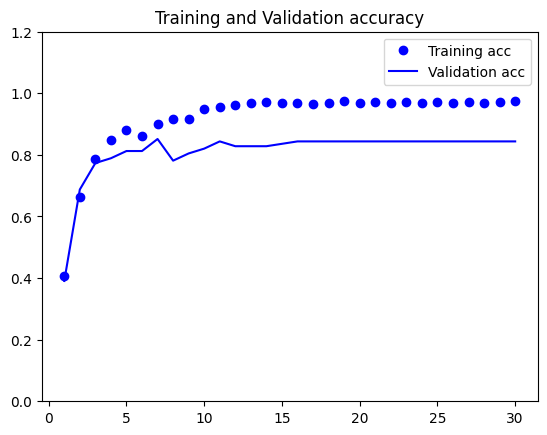

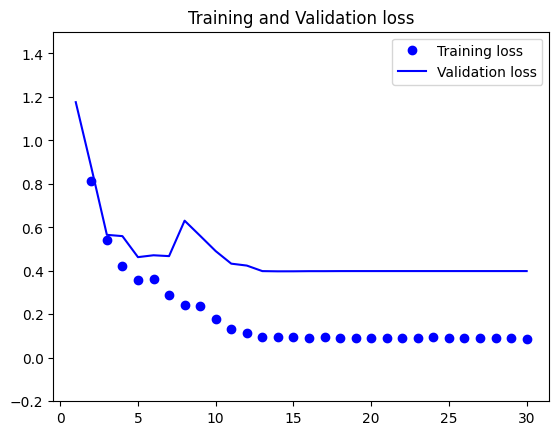

In [92]:
plot_history(history)

In [93]:
# The model weights (that are considered the best) can be loaded as -
model1e.load_weights(checkpoint_file_path)

### 2.6.3.  [&#8593;](#toc0_) <a id='toc2_6_3_'></a>Model results

In [94]:
report(model1e, train_generator, "Train")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         43   46    52      69
           Rain           33   29    41      47
           Shine          43   41    37      56
           Sunrise        66   42    63      78

Train Report
              precision    recall  f1-score   support

      Cloudy       0.23      0.20      0.22       210
        Rain       0.18      0.19      0.19       150
       Shine       0.19      0.21      0.20       177
     Sunrise       0.31      0.31      0.31       249

    accuracy                           0.24       786
   macro avg       0.23      0.23      0.23       786
weighted avg       0.24      0.24      0.24       786



In [95]:
report(model1e, validation_generator, "Validation")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         38    3     4       0
           Rain            2   28     0       2
           Shine           6    1    31       0
           Sunrise         0    0     1      53

Validation Report
              precision    recall  f1-score   support

      Cloudy       0.83      0.84      0.84        45
        Rain       0.88      0.88      0.88        32
       Shine       0.86      0.82      0.84        38
     Sunrise       0.96      0.98      0.97        54

    accuracy                           0.89       169
   macro avg       0.88      0.88      0.88       169
weighted avg       0.89      0.89      0.89       169



In [96]:
report(model1e, test_generator, "Test")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         37    3     5       0
           Rain            1   30     2       0
           Shine           2    3    31       2
           Sunrise         0    0     2      52

Test Report
              precision    recall  f1-score   support

      Cloudy       0.93      0.82      0.87        45
        Rain       0.83      0.91      0.87        33
       Shine       0.78      0.82      0.79        38
     Sunrise       0.96      0.96      0.96        54

    accuracy                           0.88       170
   macro avg       0.87      0.88      0.87       170
weighted avg       0.89      0.88      0.88       170



__Add the scores to the model results.__

In [97]:
results_loss, results_acc = model1e.evaluate(test_generator)

results_df.loc[len(results_df.index)] = [
    F"Base Model-{model_id}",
    results_loss,
    results_acc,
]
results_df

3/3 [==============================] - 1s 195ms/step - loss: 0.4105 - accuracy: 0.8824


,Model,Loss Score,Accuracy Score
0,Base Model-model1a1,0.216845,0.929412
1,Base Model-model1a2-Add_Conv2d_MaxPooling,0.288702,0.917647
2,Base Model-model1b-Adam,0.234989,0.917647
3,Base Model-model1c-Batch_size_64,0.433534,0.923529
4,Base Model-model1d-feature_reduction,0.336842,0.917647
5,Base Model-model1e-reduceLR,0.410503,0.882353


Utilizando uma learning rate dinâmica, as curvas de aprendizagem apresentam a melhor suavidade e estabilidade das curvas de aprendizagem.<br>
Observa-se ainda uma ligeira redução do overfitting, o qual se mantém estável a partir da 10.ª epoch.<br>
Existe uma ligeira degradação do accuracy score de 91,7% para 88%.<br>

Olhando para o classification report e para a confusion matrix, observamos que os scores das classes 'Shine' e 'Rain' são inferiores às restantes classes.
Vamos procurar equilibrar os scores entre classes introduzindo class weights diferenciados no treino do modelo.


## 2.7.  [&#8593;](#toc0_) <a id='toc2_7_'></a>Base Model - 1f - Adjust Class Weights.

### 2.7.1.  [&#8593;](#toc0_) <a id='toc2_7_1_'></a>Architecture of layers and hidden units

`Modelo 1f`

- Utilizar o optimizer Adam (default learning rate)
- Suavidade curvas - Aumentar tamanho do batch size - 64 (vs 32)
- Overfitting - redução de complexidade do modelo - redução de n.º de filtros em 50%
- Overfitting - Ajustamento dinâmico do learning rate (via callbacks)
- Ajustar class weights para melhorar o balanceamento do dataset

In [98]:
model_id = 'model1f-class_weights'

In [99]:
batch_size = 64

In [100]:
# Build a simple CNN model
model1f = models.Sequential(name=f"Base_Model-{model_id}")
model1f.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model1f.add(layers.MaxPooling2D((2, 2)))
model1f.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1f.add(layers.MaxPooling2D((2, 2)))
model1f.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1f.add(layers.MaxPooling2D((2, 2)))
model1f.add(layers.Flatten())
model1f.add(layers.Dense(64, activation='relu'))
model1f.add(layers.Dense(4, activation='softmax'))  # Assuming you have 4 classes (rain, shine, sunrise, cloudy)

In [101]:
model1f.summary()

Model: "Base_Model-model1f-class_weights"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 111, 111, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None

In [102]:
model1f.compile(
    loss="categorical_crossentropy",
    # optimizer=optimizers.RMSprop(learning_rate=1e-4),
    # optimizer=optimizers.Adam(learning_rate=1e-4),
    optimizer='adam',
    metrics=["accuracy"],
)

In [103]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 786 images belonging to 4 classes.
Found 169 images belonging to 4 classes.
Found 170 images belonging to 4 classes.


In [104]:
checkpoint_dir = f"D:/Datasets/weather/saved_models/{model_id}"
logs_dir = f"logs/{model_id}"
file_name = f"{model_id}.keras"
file_history = f"{model_id}_history.log"

checkpoint_file_path = os.path.join(checkpoint_dir, file_name)
history_file_path = os.path.join(checkpoint_dir, file_history)

### 2.7.2.  [&#8593;](#toc0_) <a id='toc2_7_2_'></a>Training the model

Define the class weights.

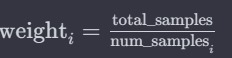

In [124]:
weights_reg=[]

for i in range(0, len(images_pd)-1):
    weights_reg.append(images_pd["Total"][4]/images_pd["Total"][i])

print(weights_reg)

[3.75, 5.232558139534884, 4.446640316205533, 3.1512605042016806]


In [122]:
images_pd['classes']

0     cloudy
1       rain
2      shine
3    sunrise
4      Total
Name: classes, dtype: object

In [120]:
train_generator.class_indices

{'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}

In [112]:
treinar = True # mudar para True para correr o modelo

if treinar:
    callbacks_list = callback_params(checkpoint_dir, checkpoint_file_path, logs_dir, history_file_path)
    
    history = model1f.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=30, # adjust as needed (may be adjusted by callbacks)
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
        callbacks=callbacks_list,
        verbose=1,
        class_weight = {0: weights_reg[0], 1: weights_reg[1], 2: weights_reg[2], 3: weights_reg[3]},
    )
else: # carrega o historico do último treino
    history = pd.read_csv(history_file_path, sep=',', engine='python')
    print(f"Loaded saved history from {history_file_path}.")

Epoch 1/30
12/12 [==============================] - ETA: 0s - loss: 5.4814 - accuracy: 0.4141
Epoch 1: val_accuracy improved from -inf to 0.46875, saving model to D:/Datasets/weather/saved_models/model1f-class_weights\model1f-class_weights.keras
12/12 [==============================] - 31s 2s/step - loss: 5.4814 - accuracy: 0.4141 - val_loss: 1.0296 - val_accuracy: 0.4688 - lr: 0.0010
Epoch 2/30
12/12 [==============================] - ETA: 0s - loss: 2.7820 - accuracy: 0.7368
Epoch 2: val_accuracy improved from 0.46875 to 0.78906, saving model to D:/Datasets/weather/saved_models/model1f-class_weights\model1f-class_weights.keras
12/12 [==============================] - 17s 1s/step - loss: 2.7820 - accuracy: 0.7368 - val_loss: 0.6520 - val_accuracy: 0.7891 - lr: 0.0010
Epoch 3/30
12/12 [==============================] - ETA: 0s - loss: 2.2217 - accuracy: 0.7936
Epoch 3: val_accuracy improved from 0.78906 to 0.79688, saving model to D:/Datasets/weather/saved_models/model1f-class_weights\

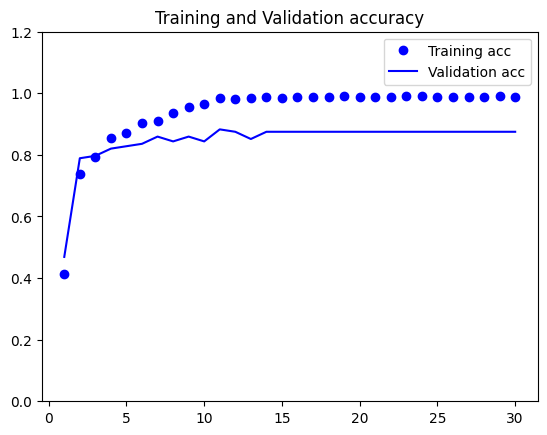

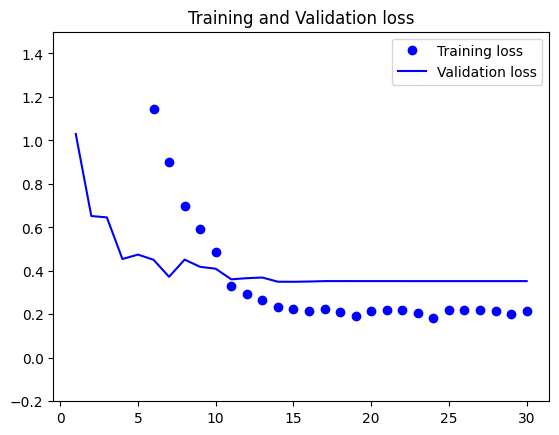

In [113]:
plot_history(history)

In [114]:
# The model weights (that are considered the best) can be loaded as -
model1f.load_weights(checkpoint_file_path)

### 2.7.3.  [&#8593;](#toc0_) <a id='toc2_7_3_'></a>Model results

In [115]:
report(model1f, train_generator, "Train")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         60   33    48      69
           Rain           40   29    30      51
           Shine          48   32    42      55
           Sunrise        65   52    58      74

Train Report
              precision    recall  f1-score   support

      Cloudy       0.28      0.29      0.28       210
        Rain       0.20      0.19      0.20       150
       Shine       0.24      0.24      0.24       177
     Sunrise       0.30      0.30      0.30       249

    accuracy                           0.26       786
   macro avg       0.25      0.25      0.25       786
weighted avg       0.26      0.26      0.26       786



In [116]:
report(model1f, validation_generator, "Validation")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         43    0     2       0
           Rain            2   30     0       0
           Shine           6    2    29       1
           Sunrise         0    1     1      52

Validation Report
              precision    recall  f1-score   support

      Cloudy       0.84      0.96      0.90        45
        Rain       0.91      0.94      0.92        32
       Shine       0.91      0.76      0.83        38
     Sunrise       0.98      0.96      0.97        54

    accuracy                           0.91       169
   macro avg       0.91      0.90      0.90       169
weighted avg       0.91      0.91      0.91       169



In [117]:
report(model1f, test_generator, "Test")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         41    0     4       0
           Rain            2   29     2       0
           Shine           1    2    33       2
           Sunrise         0    1     1      52

Test Report
              precision    recall  f1-score   support

      Cloudy       0.93      0.91      0.92        45
        Rain       0.91      0.88      0.89        33
       Shine       0.82      0.87      0.85        38
     Sunrise       0.96      0.96      0.96        54

    accuracy                           0.91       170
   macro avg       0.91      0.91      0.91       170
weighted avg       0.91      0.91      0.91       170



__Add the scores to the model results.__

In [118]:
results_loss, results_acc = model1f.evaluate(test_generator)

results_df.loc[len(results_df.index)] = [
    F"Base Model-{model_id}",
    results_loss,
    results_acc,
]

results_df

3/3 [==============================] - 2s 579ms/step - loss: 0.2552 - accuracy: 0.9118


,Model,Loss Score,Accuracy Score
0,Base Model-model1a1,0.216845,0.929412
1,Base Model-model1a2-Add_Conv2d_MaxPooling,0.288702,0.917647
2,Base Model-model1b-Adam,0.234989,0.917647
3,Base Model-model1c-Batch_size_64,0.433534,0.923529
4,Base Model-model1d-feature_reduction,0.336842,0.917647
5,Base Model-model1e-reduceLR,0.410503,0.882353
6,Base Model-model1f-class_weights,0.255229,0.911765


Utilizando class weights ajustados existe uma redução do delta no f1-score das classes.<br>
A classe 'shine' (que era a que tinha pior desempenho) melhorou de 79 para 85.<br>

O accuracy score do modelo melhora, bem como o loss score.<br>
É visível ainda uma redução do overfitting e melhoria da suavidade das curvas de aprendizagem.

## 2.8.  [&#8593;](#toc0_) <a id='toc2_8_'></a>Base Model + Augmentation + Dropout layer.

### 2.8.1.  [&#8593;](#toc0_) <a id='toc2_8_1_'></a>Data Augmentation

Vamos tentar melhorar ainda mais o overfitting, introduzindo uma técnica de "Data Augmentation" e uma Dropout layer.

In [125]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, #
    width_shift_range=0.2, #
    height_shift_range=0.2, #
    shear_range=0.2, #
    zoom_range=0.2, #
    horizontal_flip=True, #
    fill_mode='nearest',
    brightness_range = [0.3, 1.7], #
    channel_shift_range=0.2,
)

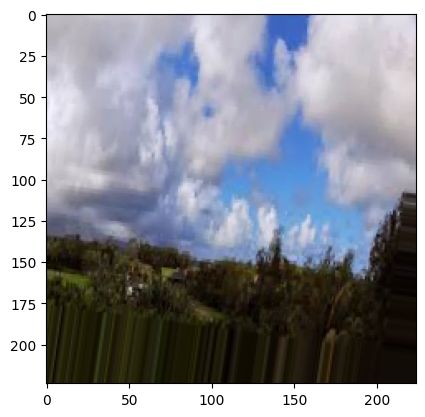

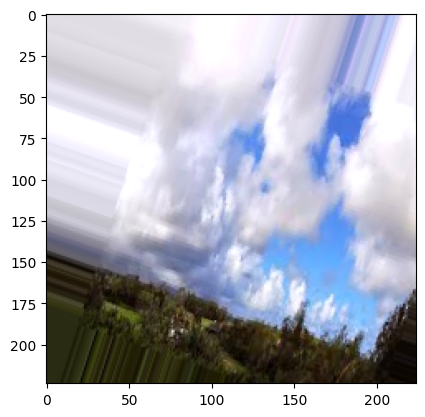

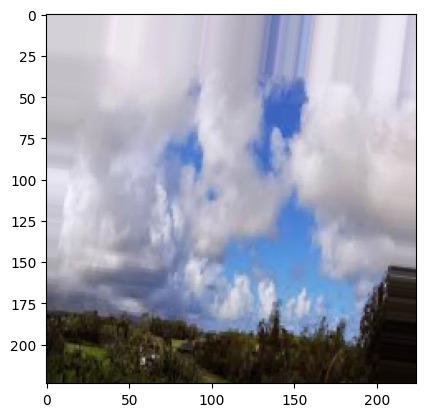

In [126]:
dir = os.path.join(train_dir, 'cloudy')
fnames = [os.path.join(dir, fname) for fname in os.listdir(dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size=img_size)

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 3 == 0:
        break

plt.show()

### 2.8.2.  [&#8593;](#toc0_) <a id='toc2_8_2_'></a>Architecture of layers and hidden units

`Modelo 2`

- Utilizar o optimizer Adam (default learning rate)
- Suavidade curvas - Aumentar tamanho do batch size - 64 (vs 32)
- Overfitting - redução de complexidade do modelo - redução de n.º de filtros em 50%
- Overfitting - Ajustamento dinâmico do learning rate (via callbacks)
- Ajustar class weights para melhorar o balanceamento do dataset <br>
- Data Augmentation + Dropout Layer

__`NOTA:`__ Partindo do modelo anterior - Modelo 1f com as alterações indicadas acima - a aplicação de Data Augmentation e Dropout layer produz resultados inesperados no que se refere às loss curves.
O facto de já termos aplicado técnicas de redução de overfitting, nomeadamente a redução da complexidade do modelo, em conjunto com o Data Augmentation+Dropout não permite que o modelo se adeque ao problema.

Abaixo seguem os plots:


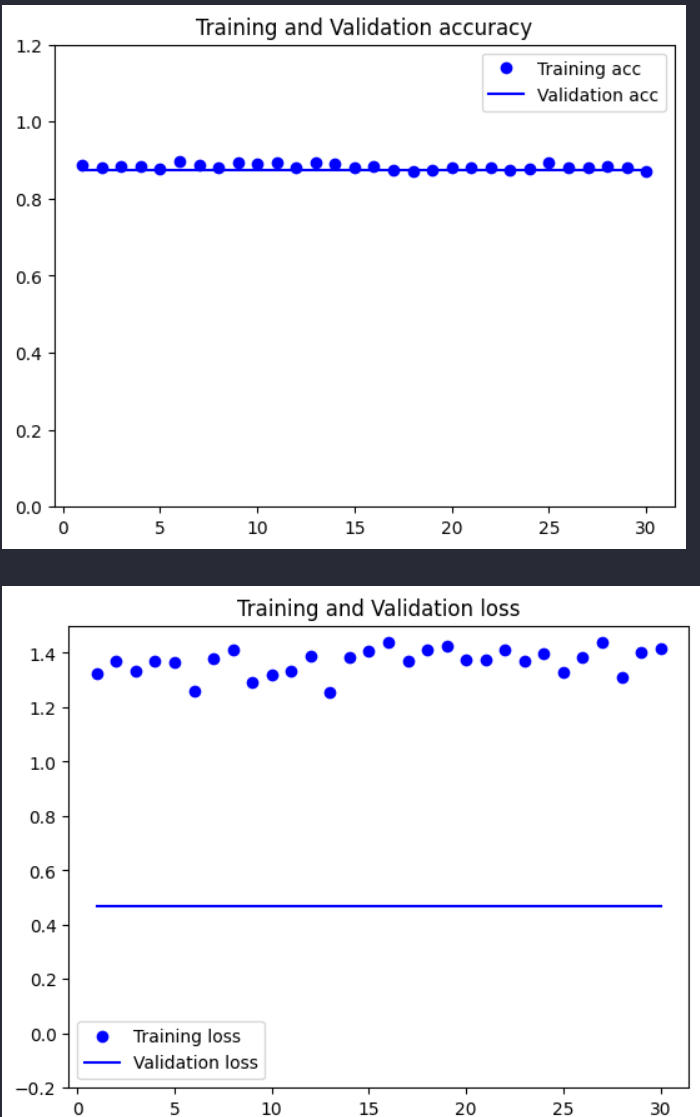

Desta forma, vamos reverter a seguinte operação:
- Overfitting - redução de complexidade do modelo - redução de n.º de filtros em 50%

In [127]:
model_id = 'model2'

In [128]:
model2 = models.Sequential(name=f"Augmentation_Dropout-{model_id}")
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model2.add(layers.MaxPooling2D(2 ,2))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D(2 ,2))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D(2 ,2))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D(2 ,2))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(4, activation='softmax'))

model2.compile(
    loss="categorical_crossentropy",
    # optimizer=optimizers.RMSprop(learning_rate=1e-4),
    # optimizer=optimizers.Adam(learning_rate=1e-4),
    optimizer='adam',
    metrics=["accuracy"],
)

In [129]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, #
    width_shift_range=0.2, #
    height_shift_range=0.2, #
    shear_range=0.2, #
    zoom_range=0.2, #
    horizontal_flip=True, #
    fill_mode='nearest',
    brightness_range = [0.3, 1.7], #
    channel_shift_range=0.2,
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 786 images belonging to 4 classes.
Found 169 images belonging to 4 classes.
Found 170 images belonging to 4 classes.


In [130]:
checkpoint_dir = f"D:/Datasets/weather/saved_models/{model_id}"
logs_dir = f"logs/{model_id}"
file_name = f"{model_id}.keras"
file_history = f"{model_id}_history.log"

checkpoint_file_path = os.path.join(checkpoint_dir, file_name)
history_file_path = os.path.join(checkpoint_dir, file_history)

### 2.8.3.  [&#8593;](#toc0_) <a id='toc2_8_3_'></a>Training the model

In [131]:
treinar = True # mudar para True para correr o modelo

if treinar:
    callbacks_list = callback_params(checkpoint_dir, checkpoint_file_path, logs_dir, history_file_path)
    
    history = model2.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=100, # adjust as needed (may be adjusted by callbacks)
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
        callbacks=callbacks_list,
        verbose=1,
        class_weight = {0: weights_reg[0], 1: weights_reg[1], 2: weights_reg[2], 3: weights_reg[3]},
    )
else: # carrega o historico do último treino
    history = pd.read_csv(history_file_path, sep=',', engine='python')
    print(f"Loaded saved history from {history_file_path}.")

Epoch 1/100
12/12 [==============================] - ETA: 0s - loss: 4.7179 - accuracy: 0.4709
Epoch 1: val_accuracy improved from -inf to 0.53906, saving model to D:/Datasets/weather/saved_models/model2\model2.keras
12/12 [==============================] - 42s 3s/step - loss: 4.7179 - accuracy: 0.4709 - val_loss: 0.9209 - val_accuracy: 0.5391 - lr: 0.0010
Epoch 2/100
12/12 [==============================] - ETA: 0s - loss: 3.4092 - accuracy: 0.6981
Epoch 2: val_accuracy improved from 0.53906 to 0.62500, saving model to D:/Datasets/weather/saved_models/model2\model2.keras
12/12 [==============================] - 28s 2s/step - loss: 3.4092 - accuracy: 0.6981 - val_loss: 0.7925 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 3/100
12/12 [==============================] - ETA: 0s - loss: 2.9252 - accuracy: 0.7161
Epoch 3: val_accuracy improved from 0.62500 to 0.66406, saving model to D:/Datasets/weather/saved_models/model2\model2.keras
12/12 [==============================] - 32s 3s/step - loss

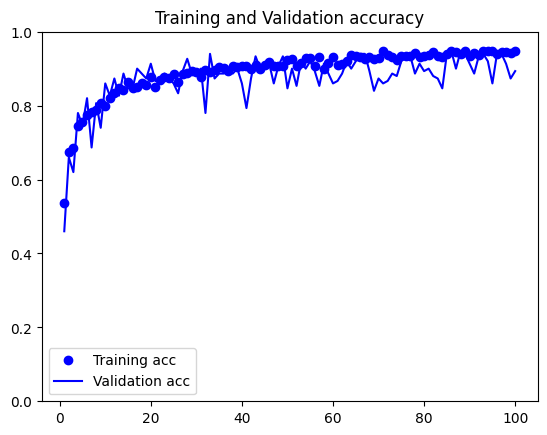

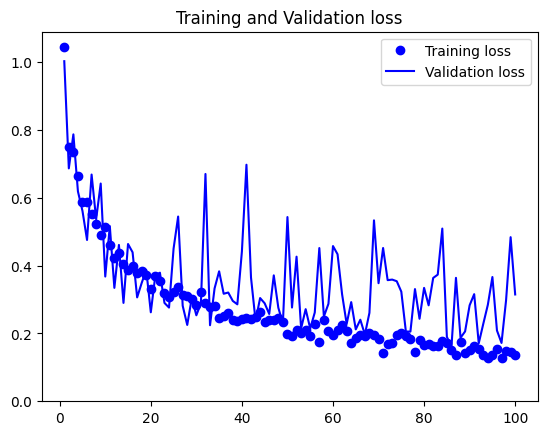

In [ ]:
plot_history(history)

In [132]:
# The model weights (that are considered the best) can be loaded as -
model2.load_weights(checkpoint_file_path)

### 2.8.4.  [&#8593;](#toc0_) <a id='toc2_8_4_'></a>Model results

In [133]:
report(model2, train_generator, "Train")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         60   27    52      71
           Rain           46   18    45      41
           Shine          47   22    43      65
           Sunrise        90   28    66      65

Train Report
              precision    recall  f1-score   support

      Cloudy       0.25      0.29      0.26       210
        Rain       0.19      0.12      0.15       150
       Shine       0.21      0.24      0.22       177
     Sunrise       0.27      0.26      0.26       249

    accuracy                           0.24       786
   macro avg       0.23      0.23      0.23       786
weighted avg       0.23      0.24      0.23       786



In [134]:
report(model2, validation_generator, "Validation")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         38    1     6       0
           Rain            7   22     2       1
           Shine           5    0    33       0
           Sunrise         0    0     2      52

Validation Report
              precision    recall  f1-score   support

      Cloudy       0.76      0.84      0.80        45
        Rain       0.96      0.69      0.80        32
       Shine       0.77      0.87      0.81        38
     Sunrise       0.98      0.96      0.97        54

    accuracy                           0.86       169
   macro avg       0.87      0.84      0.85       169
weighted avg       0.87      0.86      0.86       169



In [135]:
report(model2, test_generator, "Test")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         35    2     8       0
           Rain            5   26     2       0
           Shine           3    0    34       1
           Sunrise         0    0     3      51

Test Report
              precision    recall  f1-score   support

      Cloudy       0.81      0.78      0.80        45
        Rain       0.93      0.79      0.85        33
       Shine       0.72      0.89      0.80        38
     Sunrise       0.98      0.94      0.96        54

    accuracy                           0.86       170
   macro avg       0.86      0.85      0.85       170
weighted avg       0.87      0.86      0.86       170



__Add the scores to the model results.__

In [97]:
results_loss, results_acc = model2.evaluate(test_generator)

results_df.loc[len(results_df.index)] = [
    f"Augmentation+Dropout-{model_id}",
    results_loss,
    results_acc,
]
results_df

,Model,Loss Score,Accuracy Score
0,Base Model-model1a1,0.216845,0.929412
1,Base Model-model1a2-Add_Conv2d_MaxPooling,0.288702,0.917647
2,Base Model-model1b-Adam,0.234989,0.917647
3,Base Model-model1c-Batch_size_64,0.433534,0.923529
4,Base Model-model1d-feature_reduction,0.336842,0.917647
5,Base Model-model1e-reduceLR,0.410503,0.882353
6,Base Model-model1f-class_weights,0.255229,0.911765
7,Augmentation+Dropout-model2,0.207005,0.964706


## 2.9.  [&#8593;](#toc0_) <a id='toc2_9_'></a>Transfer Learning - ResNet50 Model (with added just the output layer).

`Modelo 3a`

- Utilizar modelo pré-treinado - ResNet50 - adding 1 output layer.

In [17]:
model_id = 'model3a-1_layer'

In this approach we'll try to improve the results by using a pretrained model - ResNet50, adding only the output layer.

### 2.9.1.  [&#8593;](#toc0_) <a id='toc2_9_1_'></a>Feature Extraction - Pre-trained Convolutional Layers

In [18]:
base_model = ResNet50(weights="imagenet", include_top=False) # import only convolutional layers, droping the fully-connected layer.

### 2.9.2.  [&#8593;](#toc0_) <a id='toc2_9_2_'></a>Architecture of Fully-Connected layer and Output layer.

In [19]:
x = base_model.output
x = layers.GlobalMaxPooling2D()(x) # used to obtain a 2D tensor to feed the output layer.
x = layers.Dense(4, activation='softmax')(x)

model3a = Model(base_model.input, x, name="ResNet50-1_layer")

In [20]:
model3a.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=["accuracy"],
)

In [21]:
model3a.summary()

Model: "ResNet50-1_layer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                               

In [22]:
for layer in model3a.layers[:-2]:
    layer.trainable = False

In [23]:
for i, layer in enumerate(model3a.layers):
    print(i, layer.name, "-", layer.trainable)

0 input_1 - False
1 conv1_pad - False
2 conv1_conv - False
3 conv1_bn - False
4 conv1_relu - False
5 pool1_pad - False
6 pool1_pool - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_conv - False
11 conv2_block1_2_bn - False
12 conv2_block1_2_relu - False
13 conv2_block1_0_conv - False
14 conv2_block1_3_conv - False
15 conv2_block1_0_bn - False
16 conv2_block1_3_bn - False
17 conv2_block1_add - False
18 conv2_block1_out - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_conv - False
23 conv2_block2_2_bn - False
24 conv2_block2_2_relu - False
25 conv2_block2_3_conv - False
26 conv2_block2_3_bn - False
27 conv2_block2_add - False
28 conv2_block2_out - False
29 conv2_block3_1_conv - False
30 conv2_block3_1_bn - False
31 conv2_block3_1_relu - False
32 conv2_block3_2_conv - False
33 conv2_block3_2_bn - False
34 conv2_block3_2_relu - False
35 conv2_block3_3_conv - 

__`NOTA:`__ Correndo com um batch size de 64 torna-se impraticável correr o modelo.

In [ ]:
batch_size = 16

In [28]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, #
    width_shift_range=0.2, #
    height_shift_range=0.2, #
    shear_range=0.2, #
    zoom_range=0.2, #
    horizontal_flip=True, #
    fill_mode='nearest',
    brightness_range = [0.3, 1.7], #
    channel_shift_range=0.2,
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode="categorical"
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
)

Found 786 images belonging to 4 classes.
Found 169 images belonging to 4 classes.
Found 170 images belonging to 4 classes.


In [29]:
checkpoint_dir = f"D:/Datasets/weather/saved_models/{model_id}"
logs_dir = f"logs/{model_id}"
file_name = f"{model_id}.keras"
file_history = f"{model_id}_history.log"

checkpoint_file_path = os.path.join(checkpoint_dir, file_name)
history_file_path = os.path.join(checkpoint_dir, file_history)

### 2.9.3.  [&#8593;](#toc0_) <a id='toc2_9_3_'></a>Training the model

In [30]:
treinar = True # mudar para True para correr o modelo

if treinar:
    callbacks_list = callback_params(checkpoint_dir, checkpoint_file_path, logs_dir, history_file_path)
    
    history = model3a.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=30, # adjust as needed (may be adjusted by callbacks)
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
        callbacks=callbacks_list,
        verbose=1,
        class_weight = {0: weights_reg[0], 1: weights_reg[1], 2: weights_reg[2], 3: weights_reg[3]},
    )
else: # carrega o historico do último treino
    history = pd.read_csv(history_file_path, sep=',', engine='python')
    print(f"Loaded saved history from {history_file_path}.")

Epoch 1/30


49/49 [==============================] - ETA: 0s - loss: 12.5189 - accuracy: 0.7883
Epoch 1: val_accuracy improved from -inf to 0.28125, saving model to D:/Datasets/weather/saved_models/model3a-1_layer\model3a-1_layer.keras
49/49 [==============================] - 296s 5s/step - loss: 12.5189 - accuracy: 0.7883 - val_loss: 3146.2295 - val_accuracy: 0.2812 - lr: 0.0010
Epoch 2/30
49/49 [==============================] - ETA: 0s - loss: 7.3933 - accuracy: 0.7390
Epoch 2: val_accuracy did not improve from 0.28125
49/49 [==============================] - 289s 6s/step - loss: 7.3933 - accuracy: 0.7390 - val_loss: 1.4016 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 3/30
49/49 [==============================] - ETA: 0s - loss: 17.4580 - accuracy: 0.5883
Epoch 3: val_accuracy did not improve from 0.28125
49/49 [==============================] - 202s 4s/step - loss: 17.4580 - accuracy: 0.5883 - val_loss: 50186.6484 - val_accuracy: 0.2812 - lr: 0.0010
Epoch 4/30
49/49 [================

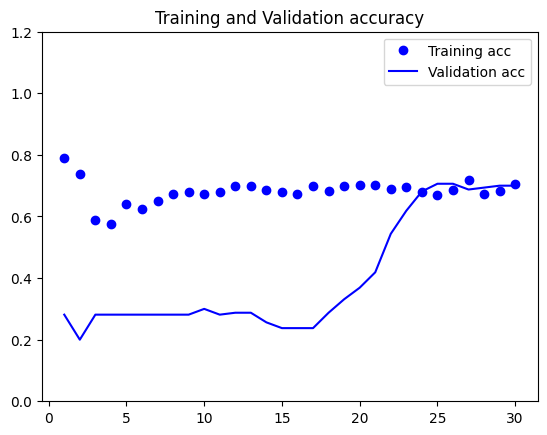

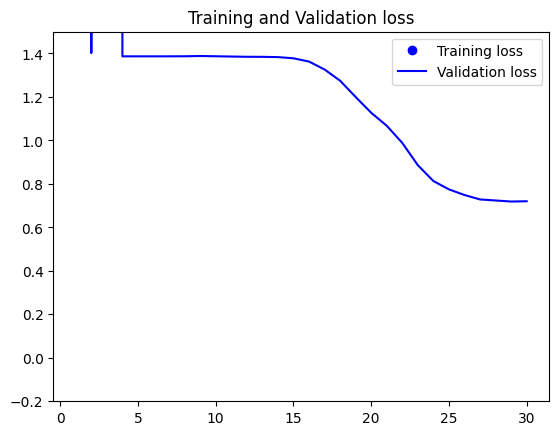

In [31]:
plot_history(history)

In [32]:
# The model weights (that are considered the best) can be loaded as -
model3a.load_weights(checkpoint_file_path)

### 2.9.4.  [&#8593;](#toc0_) <a id='toc2_9_4_'></a>Model results

In [33]:
report(model3a, train_generator, "Train")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         32   85    46      47
           Rain           25   58    40      27
           Shine          30   58    58      31
           Sunrise        42  103    63      41

Train Report
              precision    recall  f1-score   support

      Cloudy       0.25      0.15      0.19       210
        Rain       0.19      0.39      0.26       150
       Shine       0.28      0.33      0.30       177
     Sunrise       0.28      0.16      0.21       249

    accuracy                           0.24       786
   macro avg       0.25      0.26      0.24       786
weighted avg       0.25      0.24      0.23       786



In [34]:
report(model3a, validation_generator, "Validation")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         19   20     5       1
           Rain            3   27     1       1
           Shine           4    2    32       0
           Sunrise         2    5     7      40

Validation Report
              precision    recall  f1-score   support

      Cloudy       0.68      0.42      0.52        45
        Rain       0.50      0.84      0.63        32
       Shine       0.71      0.84      0.77        38
     Sunrise       0.95      0.74      0.83        54

    accuracy                           0.70       169
   macro avg       0.71      0.71      0.69       169
weighted avg       0.74      0.70      0.70       169



In [35]:
report(model3a, test_generator, "Test")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         18   24     3       0
           Rain            2   31     0       0
           Shine           5    2    31       0
           Sunrise         4    9     7      34

Test Report
              precision    recall  f1-score   support

      Cloudy       0.62      0.40      0.49        45
        Rain       0.47      0.94      0.63        33
       Shine       0.76      0.82      0.78        38
     Sunrise       1.00      0.63      0.77        54

    accuracy                           0.67       170
   macro avg       0.71      0.70      0.67       170
weighted avg       0.74      0.67      0.67       170



__Add the scores to the model results.__

In [98]:
results_loss, results_acc = model3a.evaluate(test_generator)

results_df.loc[len(results_df.index)] = [
    f"ResNet50-{model_id}",
    results_loss,
    results_acc,
]
results_df

,Model,Loss Score,Accuracy Score
0,Base Model-model1a1,0.216845,0.929412
1,Base Model-model1a2-Add_Conv2d_MaxPooling,0.288702,0.917647
2,Base Model-model1b-Adam,0.234989,0.917647
3,Base Model-model1c-Batch_size_64,0.433534,0.923529
4,Base Model-model1d-feature_reduction,0.336842,0.917647
5,Base Model-model1e-reduceLR,0.410503,0.882353
6,Base Model-model1f-class_weights,0.255229,0.911765
7,Augmentation+Dropout-model2,0.207005,0.964706
8,ResNet50-model3a-1_layer,0.797388,0.670588


Os resultados utilizando o ResNet50 com apenas uma layer de output não são satisfatórios. Vamos acrescentar mais algumas camadas para permitir uma melhor aprendizagem do modelo no nosso dataset.

## 2.10.  [&#8593;](#toc0_) <a id='toc2_10_'></a>Transfer Learning - ResNet50 Model (with added 5 layers).

`Modelo 3b`

- Utilizar modelo pré-treinado - ResNet50 - 5 layers.

In [37]:
model_id = 'model3b-5_layers'

In this approach we'll try to improve the results by using a pretrained model - ResNet50, adding 5 layers.

### 2.10.1.  [&#8593;](#toc0_) <a id='toc2_10_1_'></a>Feature Extraction - Pre-trained Convolutional Layers

In [38]:
base_model = ResNet50(weights="imagenet", include_top=False) # import only convolutional layers, droping the fully-connected layer.

### 2.10.2.  [&#8593;](#toc0_) <a id='toc2_10_2_'></a>Architecture of Fully-Connected layer and Output layer.

In [39]:
x = base_model.output
x = layers.GlobalMaxPooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(100, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(4, activation='softmax')(x)

model3b = Model(base_model.input, x, name="ResNet50-5_layers")

In [40]:
model3b.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=["accuracy"],
)

In [41]:
model3b.summary()

Model: "ResNet50-5_layers"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                              

In [42]:
for layer in model3b.layers[:-5]:
    layer.trainable = False

In [43]:
for i, layer in enumerate(model3b.layers):
    print(i, layer.name, "-", layer.trainable)

0 input_2 - False
1 conv1_pad - False
2 conv1_conv - False
3 conv1_bn - False
4 conv1_relu - False
5 pool1_pad - False
6 pool1_pool - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_conv - False
11 conv2_block1_2_bn - False
12 conv2_block1_2_relu - False
13 conv2_block1_0_conv - False
14 conv2_block1_3_conv - False
15 conv2_block1_0_bn - False
16 conv2_block1_3_bn - False
17 conv2_block1_add - False
18 conv2_block1_out - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_conv - False
23 conv2_block2_2_bn - False
24 conv2_block2_2_relu - False
25 conv2_block2_3_conv - False
26 conv2_block2_3_bn - False
27 conv2_block2_add - False
28 conv2_block2_out - False
29 conv2_block3_1_conv - False
30 conv2_block3_1_bn - False
31 conv2_block3_1_relu - False
32 conv2_block3_2_conv - False
33 conv2_block3_2_bn - False
34 conv2_block3_2_relu - False
35 conv2_block3_3_conv - 

__`NOTA:`__ De forma a ser possível correr o modelo no nosssos computadores pessoais, o batch size e o image size estão ajustados.

In [44]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, #
    width_shift_range=0.2, #
    height_shift_range=0.2, #
    shear_range=0.2, #
    zoom_range=0.2, #
    horizontal_flip=True, #
    fill_mode='nearest',
    brightness_range = [0.3, 1.7], #
    channel_shift_range=0.2,
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=15,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=15,
    class_mode='categorical',
    shuffle=False)

Found 786 images belonging to 4 classes.
Found 169 images belonging to 4 classes.
Found 170 images belonging to 4 classes.


In [45]:
checkpoint_dir = f"D:/Datasets/weather/saved_models/{model_id}"
logs_dir = f"logs/{model_id}"
file_name = f"{model_id}.keras"
file_history = f"{model_id}_history.log"

checkpoint_file_path = os.path.join(checkpoint_dir, file_name)
history_file_path = os.path.join(checkpoint_dir, file_history)

### 2.10.3.  [&#8593;](#toc0_) <a id='toc2_10_3_'></a>Training the model

In [ ]:
treinar = True # mudar para True para correr o modelo

if treinar:
    callbacks_list = callback_params(checkpoint_dir, checkpoint_file_path, logs_dir, history_file_path)
    
    history = model3b.fit(
        train_generator,
        steps_per_epoch=40,
        epochs=40, # adjust as needed (may be adjusted by callbacks)
        validation_data=validation_generator,
        validation_steps=10,
        callbacks=callbacks_list,
        verbose=1,
    )
else: # carrega o historico do último treino
    history = pd.read_csv(history_file_path, sep=',', engine='python')
    print(f"Loaded saved history from {history_file_path}.")

Epoch 1/40
40/40 [==============================] - ETA: 0s - loss: 5.5991 - accuracy: 0.4809
Epoch 1: val_accuracy improved from -inf to 0.23333, saving model to D:/Datasets/weather/saved_models\model3.keras
40/40 [==============================] - 141s 3s/step - loss: 5.5991 - accuracy: 0.4809 - val_loss: 12.6589 - val_accuracy: 0.2333
Epoch 2/40
40/40 [==============================] - ETA: 0s - loss: 2.0835 - accuracy: 0.7176
Epoch 2: val_accuracy did not improve from 0.23333
40/40 [==============================] - 102s 3s/step - loss: 2.0835 - accuracy: 0.7176 - val_loss: 32.2244 - val_accuracy: 0.2333
Epoch 3/40
40/40 [==============================] - ETA: 0s - loss: 1.1379 - accuracy: 0.8142
Epoch 3: val_accuracy did not improve from 0.23333
40/40 [==============================] - 98s 2s/step - loss: 1.1379 - accuracy: 0.8142 - val_loss: 27.1003 - val_accuracy: 0.2333
Epoch 4/40
40/40 [==============================] - ETA: 0s - loss: 0.8968 - accuracy: 0.8524
Epoch 4: val_ac

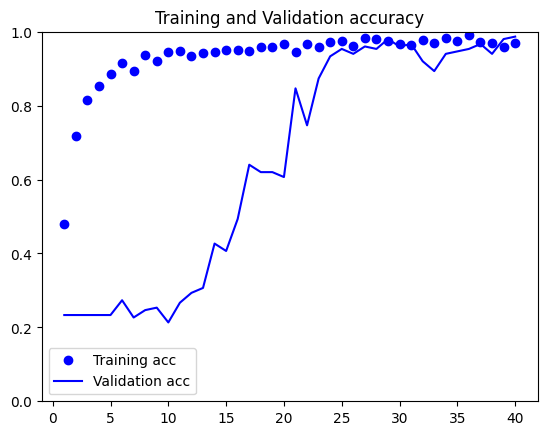

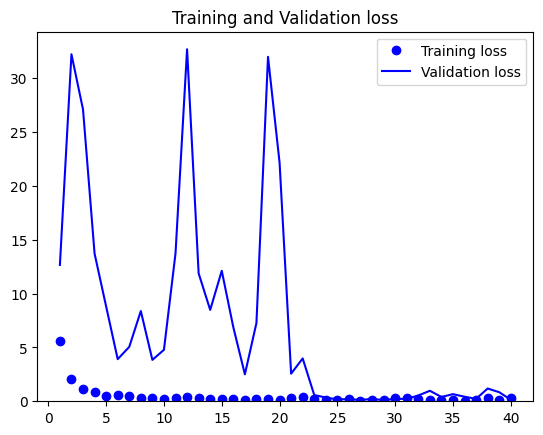

In [ ]:
plot_history(history)

In [48]:
# The model weights (that are considered the best) can be loaded as -
model3b.load_weights(checkpoint_file_path)

### 2.10.4.  [&#8593;](#toc0_) <a id='toc2_10_4_'></a>Model results

In [ ]:
report(model3b, train_generator, "Train")

Train Report
              precision    recall  f1-score   support

      Cloudy       0.34      0.35      0.35       210
        Rain       0.23      0.23      0.23       150
       Shine       0.20      0.20      0.20       177
     Sunrise       0.32      0.31      0.31       249

    accuracy                           0.28       786
   macro avg       0.27      0.27      0.27       786
weighted avg       0.28      0.28      0.28       786



In [ ]:
report(model3b, validation_generator, "Validation")

Validation Report
              precision    recall  f1-score   support

      Cloudy       0.98      0.98      0.98        45
        Rain       1.00      1.00      1.00        32
       Shine       0.97      0.97      0.97        38
     Sunrise       1.00      1.00      1.00        54

    accuracy                           0.99       169
   macro avg       0.99      0.99      0.99       169
weighted avg       0.99      0.99      0.99       169



In [ ]:
report(model3b, test_generator, "Test")

Test Report
              precision    recall  f1-score   support

      Cloudy       0.94      0.98      0.96        45
        Rain       0.97      1.00      0.99        33
       Shine       1.00      0.92      0.96        38
     Sunrise       0.98      0.98      0.98        54

    accuracy                           0.97       170
   macro avg       0.97      0.97      0.97       170
weighted avg       0.97      0.97      0.97       170



__Add the scores to the model results.__

In [99]:
results_loss, results_acc = model3b.evaluate(test_generator)

results_df.loc[len(results_df.index)] = [
    f"ResNet50-{model_id}",
    results_loss,
    results_acc,
]
results_df

,Model,Loss Score,Accuracy Score
0,Base Model-model1a1,0.216845,0.929412
1,Base Model-model1a2-Add_Conv2d_MaxPooling,0.288702,0.917647
2,Base Model-model1b-Adam,0.234989,0.917647
3,Base Model-model1c-Batch_size_64,0.433534,0.923529
4,Base Model-model1d-feature_reduction,0.336842,0.917647
5,Base Model-model1e-reduceLR,0.410503,0.882353
6,Base Model-model1f-class_weights,0.255229,0.911765
7,Augmentation+Dropout-model2,0.207005,0.964706
8,ResNet50-model3a-1_layer,0.797388,0.670588
9,ResNet50-model3b-5_layers,0.246932,0.970588


O modelo pré-treinado ResNet50 com 5 camadas adicionais apresenta excelentes resultados.<br>
A partir da 25.ª epoch, o overfitting é completamente mitigado e os accuracy scores do train and validation estão muito próximos.<br>
O accuracy score do test dataset chega aos 97%. Apesar de nesta configuração não serem ajustados os class weights, também entre as classes o delta nos scores é bastante reduzido, o que torna o modelo bastante equilibrado.

## 2.11.  [&#8593;](#toc0_) <a id='toc2_11_'></a>Transfer Learning - VGG16 Model (with added just the output layer).

`Modelo 4a`

- Utilizar modelo pré-treinado - VGG16 - adding 1 output layer.

In [53]:
model_id = 'model4a-1_layer'

In this approach we'll try to improve the results by using a pretrained model - VGG16, adding only the output layer.

### 2.11.1.  [&#8593;](#toc0_) <a id='toc2_11_1_'></a>Feature Extraction - Pre-trained Convolutional Layers

In [54]:
base_model = VGG16(weights="imagenet", include_top=False) # import only convolutional layers, droping the fully-connected layer.

### 2.11.2.  [&#8593;](#toc0_) <a id='toc2_11_2_'></a>Architecture of Fully-Connected layer and Output layer.

In [55]:
x = base_model.output
x = layers.GlobalMaxPooling2D()(x) # used to obtain a 2D tensor to feed the output layer.
x = layers.Dense(4, activation='softmax')(x)

model4a = Model(base_model.input, x, name="VGG16-1_layer")

In [56]:
model4a.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=["accuracy"],
)

In [57]:
model4a.summary()

Model: "VGG16-1_layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128) 

In [58]:
for layer in model4a.layers[:-2]:
    layer.trainable = False

In [59]:
for i, layer in enumerate(model4a.layers):
    print(i, layer.name, "-", layer.trainable)

0 input_3 - False
1 block1_conv1 - False
2 block1_conv2 - False
3 block1_pool - False
4 block2_conv1 - False
5 block2_conv2 - False
6 block2_pool - False
7 block3_conv1 - False
8 block3_conv2 - False
9 block3_conv3 - False
10 block3_pool - False
11 block4_conv1 - False
12 block4_conv2 - False
13 block4_conv3 - False
14 block4_pool - False
15 block5_conv1 - False
16 block5_conv2 - False
17 block5_conv3 - False
18 block5_pool - False
19 global_max_pooling2d_2 - True
20 dense_3 - True


In [60]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, #
    width_shift_range=0.2, #
    height_shift_range=0.2, #
    shear_range=0.2, #
    zoom_range=0.2, #
    horizontal_flip=True, #
    fill_mode='nearest',
    brightness_range = [0.3, 1.7], #
    channel_shift_range=0.2,
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode="categorical"
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
)

Found 786 images belonging to 4 classes.
Found 169 images belonging to 4 classes.
Found 170 images belonging to 4 classes.


In [61]:
checkpoint_dir = f"D:/Datasets/weather/saved_models/{model_id}"
logs_dir = f"logs/{model_id}"
file_name = f"{model_id}.keras"
file_history = f"{model_id}_history.log"

checkpoint_file_path = os.path.join(checkpoint_dir, file_name)
history_file_path = os.path.join(checkpoint_dir, file_history)

### 2.11.3.  [&#8593;](#toc0_) <a id='toc2_11_3_'></a>Training the model

In [62]:
treinar = True # mudar para True para correr o modelo

if treinar:
    callbacks_list = callback_params(checkpoint_dir, checkpoint_file_path, logs_dir, history_file_path)
    
    history = model4a.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=30, # adjust as needed (may be adjusted by callbacks)
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
        callbacks=callbacks_list,
        verbose=1,
        class_weight = {0: weights_reg[0], 1: weights_reg[1], 2: weights_reg[2], 3: weights_reg[3]},
    )
else: # carrega o historico do último treino
    history = pd.read_csv(history_file_path, sep=',', engine='python')
    print(f"Loaded saved history from {history_file_path}.")

Epoch 1/30


49/49 [==============================] - ETA: 0s - loss: 6.5469 - accuracy: 0.3494
Epoch 1: val_accuracy improved from -inf to 0.28125, saving model to D:/Datasets/weather/saved_models/model4a-1_layer\model4a-1_layer.keras
49/49 [==============================] - 499s 10s/step - loss: 6.5469 - accuracy: 0.3494 - val_loss: 1.5684 - val_accuracy: 0.2812 - lr: 0.0010
Epoch 2/30
49/49 [==============================] - ETA: 0s - loss: 4.9402 - accuracy: 0.4078
Epoch 2: val_accuracy improved from 0.28125 to 0.46250, saving model to D:/Datasets/weather/saved_models/model4a-1_layer\model4a-1_layer.keras
49/49 [==============================] - 495s 10s/step - loss: 4.9402 - accuracy: 0.4078 - val_loss: 0.9922 - val_accuracy: 0.4625 - lr: 0.0010
Epoch 3/30
49/49 [==============================] - ETA: 0s - loss: 3.8921 - accuracy: 0.5532
Epoch 3: val_accuracy improved from 0.46250 to 0.71875, saving model to D:/Datasets/weather/saved_models/model4a-1_layer\model4a-1_layer.keras
49/49 [========

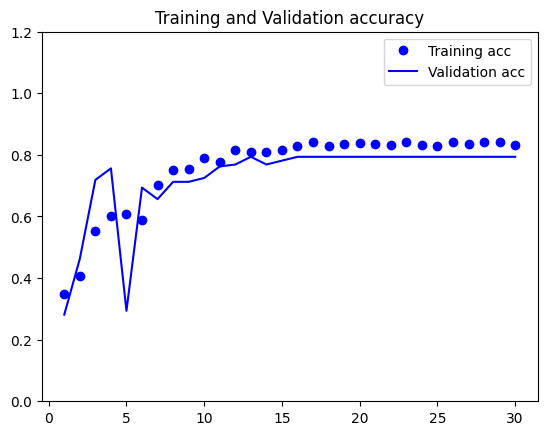

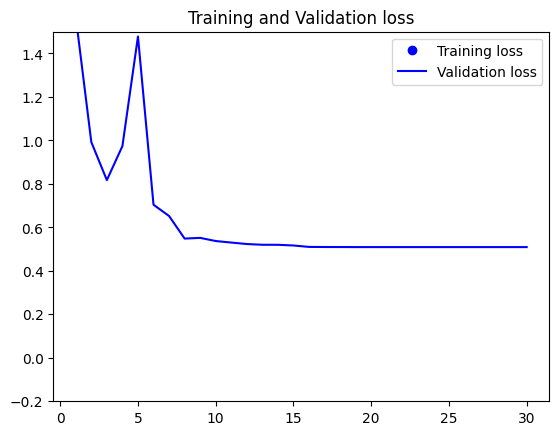

In [63]:
plot_history(history)

In [64]:
# The model weights (that are considered the best) can be loaded as -
model4a.load_weights(checkpoint_file_path)

### 2.11.4.  [&#8593;](#toc0_) <a id='toc2_11_4_'></a>Model results

In [65]:
report(model4a, train_generator, "Train")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         48   50    56      56
           Rain           27   35    41      47
           Shine          39   40    41      57
           Sunrise        46   61    58      84

Train Report
              precision    recall  f1-score   support

      Cloudy       0.30      0.23      0.26       210
        Rain       0.19      0.23      0.21       150
       Shine       0.21      0.23      0.22       177
     Sunrise       0.34      0.34      0.34       249

    accuracy                           0.26       786
   macro avg       0.26      0.26      0.26       786
weighted avg       0.27      0.26      0.27       786



In [66]:
report(model4a, validation_generator, "Validation")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         22   16     7       0
           Rain            3   29     0       0
           Shine           5    1    32       0
           Sunrise         0    0     1      53

Validation Report
              precision    recall  f1-score   support

      Cloudy       0.73      0.49      0.59        45
        Rain       0.63      0.91      0.74        32
       Shine       0.80      0.84      0.82        38
     Sunrise       1.00      0.98      0.99        54

    accuracy                           0.80       169
   macro avg       0.79      0.80      0.79       169
weighted avg       0.81      0.80      0.80       169



In [67]:
report(model4a, test_generator, "Test")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         20   18     7       0
           Rain            4   29     0       0
           Shine           2    0    34       2
           Sunrise         0    0     2      52

Test Report
              precision    recall  f1-score   support

      Cloudy       0.77      0.44      0.56        45
        Rain       0.62      0.88      0.73        33
       Shine       0.79      0.89      0.84        38
     Sunrise       0.96      0.96      0.96        54

    accuracy                           0.79       170
   macro avg       0.78      0.80      0.77       170
weighted avg       0.81      0.79      0.78       170



__Add the scores to the model results.__

In [100]:
results_loss, results_acc = model4a.evaluate(test_generator)

results_df.loc[len(results_df.index)] = [
    f"VGG16-{model_id}",
    results_loss,
    results_acc,
]
results_df

,Model,Loss Score,Accuracy Score
0,Base Model-model1a1,0.216845,0.929412
1,Base Model-model1a2-Add_Conv2d_MaxPooling,0.288702,0.917647
2,Base Model-model1b-Adam,0.234989,0.917647
3,Base Model-model1c-Batch_size_64,0.433534,0.923529
4,Base Model-model1d-feature_reduction,0.336842,0.917647
5,Base Model-model1e-reduceLR,0.410503,0.882353
6,Base Model-model1f-class_weights,0.255229,0.911765
7,Augmentation+Dropout-model2,0.207005,0.964706
8,ResNet50-model3a-1_layer,0.797388,0.670588
9,ResNet50-model3b-5_layers,0.246932,0.970588


## 2.12.  [&#8593;](#toc0_) <a id='toc2_12_'></a>Transfer Learning - VGG16 Model (with added 5 layers).

`Modelo 4b`

- Utilizar modelo pré-treinado - VGG16 - 5 layers.

In [69]:
model_id = 'model4b-5_layers'

In this approach we'll try to improve the results by using a pretrained model - VGG16, adding 5 layers.

### 2.12.1.  [&#8593;](#toc0_) <a id='toc2_12_1_'></a>Feature Extraction - Pre-trained Convolutional Layers

In [70]:
base_model = VGG16(weights="imagenet", include_top=False) # import only convolutional layers, droping the fully-connected layer.

### 2.12.2.  [&#8593;](#toc0_) <a id='toc2_12_2_'></a>Architecture of Fully-Connected layer and Output layer.

In [71]:
x = base_model.output
x = layers.GlobalMaxPooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(100, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(4, activation='softmax')(x)

model4b = Model(base_model.input, x, name="VGG16-5_layers")

In [72]:
model4b.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=["accuracy"],
)

In [73]:
model4b.summary()

Model: "VGG16-5_layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)

In [74]:
for layer in model4b.layers[:-5]:
    layer.trainable = False

In [75]:
for i, layer in enumerate(model4b.layers):
    print(i, layer.name, "-", layer.trainable)

0 input_4 - False
1 block1_conv1 - False
2 block1_conv2 - False
3 block1_pool - False
4 block2_conv1 - False
5 block2_conv2 - False
6 block2_pool - False
7 block3_conv1 - False
8 block3_conv2 - False
9 block3_conv3 - False
10 block3_pool - False
11 block4_conv1 - False
12 block4_conv2 - False
13 block4_conv3 - False
14 block4_pool - False
15 block5_conv1 - False
16 block5_conv2 - False
17 block5_conv3 - False
18 block5_pool - False
19 global_max_pooling2d_3 - True
20 dropout_2 - True
21 dense_4 - True
22 dropout_3 - True
23 dense_5 - True


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, #
    width_shift_range=0.2, #
    height_shift_range=0.2, #
    shear_range=0.2, #
    zoom_range=0.2, #
    horizontal_flip=True, #
    fill_mode='nearest',
    brightness_range = [0.3, 1.7], #
    channel_shift_range=0.2,
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode="categorical"
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
)

Found 786 images belonging to 4 classes.
Found 169 images belonging to 4 classes.
Found 170 images belonging to 4 classes.


In [77]:
checkpoint_dir = f"D:/Datasets/weather/saved_models/{model_id}"
logs_dir = f"logs/{model_id}"
file_name = f"{model_id}.keras"
file_history = f"{model_id}_history.log"

checkpoint_file_path = os.path.join(checkpoint_dir, file_name)
history_file_path = os.path.join(checkpoint_dir, file_history)

### 2.12.3.  [&#8593;](#toc0_) <a id='toc2_12_3_'></a>Training the model

In [78]:
treinar = True # mudar para True para correr o modelo

if treinar:
    callbacks_list = callback_params(checkpoint_dir, checkpoint_file_path, logs_dir, history_file_path)
    
    history = model4b.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=30, # adjust as needed (may be adjusted by callbacks)
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
        callbacks=callbacks_list,
        verbose=1,
        class_weight = {0: weights_reg[0], 1: weights_reg[1], 2: weights_reg[2], 3: weights_reg[3]},
    )
else: # carrega o historico do último treino
    history = pd.read_csv(history_file_path, sep=',', engine='python')
    print(f"Loaded saved history from {history_file_path}.")

Epoch 1/30


49/49 [==============================] - ETA: 0s - loss: 6.5219 - accuracy: 0.2390
Epoch 1: val_accuracy improved from -inf to 0.28125, saving model to D:/Datasets/weather/saved_models/model4b-5_layers\model4b-5_layers.keras
49/49 [==============================] - 497s 10s/step - loss: 6.5219 - accuracy: 0.2390 - val_loss: 1.3764 - val_accuracy: 0.2812 - lr: 0.0010
Epoch 2/30
49/49 [==============================] - ETA: 0s - loss: 5.5598 - accuracy: 0.2597
Epoch 2: val_accuracy did not improve from 0.28125
49/49 [==============================] - 497s 10s/step - loss: 5.5598 - accuracy: 0.2597 - val_loss: 1.3859 - val_accuracy: 0.2375 - lr: 0.0010
Epoch 3/30
49/49 [==============================] - ETA: 0s - loss: 5.5469 - accuracy: 0.2221 
Epoch 3: val_accuracy did not improve from 0.28125
49/49 [==============================] - 633s 13s/step - loss: 5.5469 - accuracy: 0.2221 - val_loss: 1.3861 - val_accuracy: 0.2375 - lr: 0.0010
Epoch 4/30
49/49 [==============================] - 

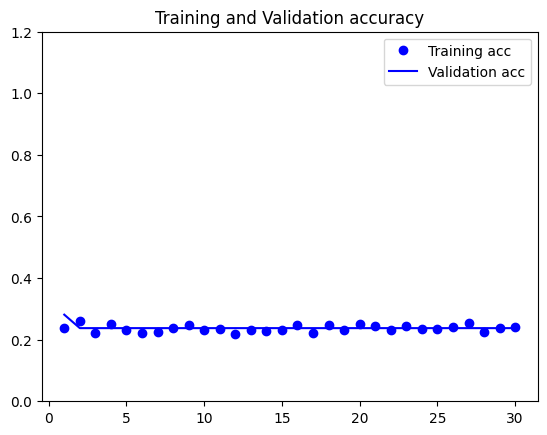

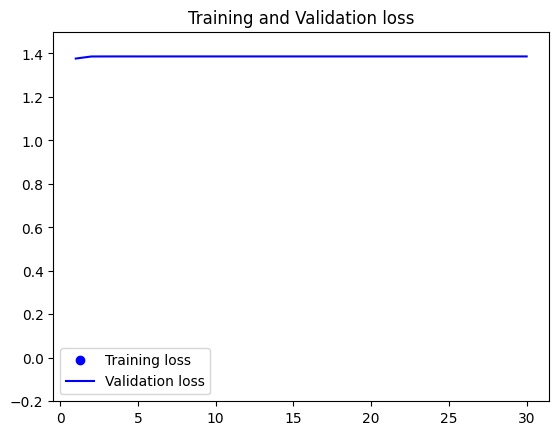

In [79]:
plot_history(history)

In [80]:
# The model weights (that are considered the best) can be loaded as -
model4b.load_weights(checkpoint_file_path)

### 2.12.4.  [&#8593;](#toc0_) <a id='toc2_12_4_'></a>Model results

In [81]:
report(model4b, train_generator, "Train")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy        208    0     2       0
           Rain          149    0     1       0
           Shine         175    0     1       1
           Sunrise       246    0     2       1

Train Report
              precision    recall  f1-score   support

      Cloudy       0.27      0.99      0.42       210
        Rain       0.00      0.00      0.00       150
       Shine       0.17      0.01      0.01       177
     Sunrise       0.50      0.00      0.01       249

    accuracy                           0.27       786
   macro avg       0.23      0.25      0.11       786
weighted avg       0.27      0.27      0.12       786



c:\Users\Marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [82]:
report(model4b, validation_generator, "Validation")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         44    0     0       1
           Rain           32    0     0       0
           Shine          37    0     1       0
           Sunrise        54    0     0       0

Validation Report
              precision    recall  f1-score   support

      Cloudy       0.26      0.98      0.42        45
        Rain       0.00      0.00      0.00        32
       Shine       1.00      0.03      0.05        38
     Sunrise       0.00      0.00      0.00        54

    accuracy                           0.27       169
   macro avg       0.32      0.25      0.12       169
weighted avg       0.30      0.27      0.12       169



c:\Users\Marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [83]:
report(model4b, test_generator, "Test")

Confusion Matrix
Rows = True labels, Columns = predicted labels

                   Predicted                   
                      Cloudy Rain Shine Sunrise
True label Class                               
           Cloudy         45    0     0       0
           Rain           32    0     1       0
           Shine          37    0     1       0
           Sunrise        54    0     0       0

Test Report
              precision    recall  f1-score   support

      Cloudy       0.27      1.00      0.42        45
        Rain       0.00      0.00      0.00        33
       Shine       0.50      0.03      0.05        38
     Sunrise       0.00      0.00      0.00        54

    accuracy                           0.27       170
   macro avg       0.19      0.26      0.12       170
weighted avg       0.18      0.27      0.12       170



c:\Users\Marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

__Add the scores to the model results.__

In [103]:
results_loss, results_acc = model4b.evaluate(test_generator)

results_df.loc[len(results_df.index)] = [
    f"VGG16-{model_id}",
    results_loss,
    results_acc,
]
results_df

,Model,Loss Score,Accuracy Score
0,Base Model-model1a1,0.216845,0.929412
1,Base Model-model1a2-Add_Conv2d_MaxPooling,0.288702,0.917647
2,Base Model-model1b-Adam,0.234989,0.917647
3,Base Model-model1c-Batch_size_64,0.433534,0.923529
4,Base Model-model1d-feature_reduction,0.336842,0.917647
5,Base Model-model1e-reduceLR,0.410503,0.882353
6,Base Model-model1f-class_weights,0.255229,0.911765
7,Augmentation+Dropout-model2,0.207005,0.964706
8,ResNet50-model3a-1_layer,0.797388,0.670588
9,ResNet50-model3b-5_layers,0.246932,0.970588


Ao contrário do que ocorreu com o modelo pré-treinado ResNet50, que melhorou a sua performance com uma fully connected layer de 1 para 5 layers, o VGG16 piorou substancialmente.

__`MODELO VENCEDOR:`__ O modelo vencedor é o modelo pré-treinado ResNet50 com 5 layers personalizados para o nosso problema de multiclassificação com um accuracy score de *97% no test dataset*, apresentando uma excelente capacidade de generalização (não apresenta overfitting).

# 3.  [&#8593;](#toc0_) <a id='toc3_'></a>Weather Prediction

<br>
Import all the needed libraries - needed is we are just running the predictions.

In [136]:
import os, shutil
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.saving import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.models import Model
import pandas as pd

## 3.1.  [&#8593;](#toc0_) <a id='toc3_1_'></a>Input Samples

In [158]:
sample_dir = "D:/Datasets/weather/new_images"

Define variables and functions to read images and predict weather condition.

In [163]:
fnames = [os.path.join(sample_dir, fname) for fname in os.listdir(sample_dir)]
classes_names = ["cloudy", "rain", "shine", "sunrise"]
# Define dataframe to store predictions on new images.
predictions_df = pd.DataFrame(columns=["File", "Model", "Classe", "Acc (%)"])

In [150]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [151]:
def predict_weather(model, fnames, classes_names):
    for img_path in fnames:
        img = image.load_img(img_path, target_size=(150, 150))
        plt.imshow(img)
        plt.show()
        # load image
        new_image = load_image(img_path)
        
        # check prediction
        predictions = model.predict(new_image, verbose=0)
        # Generate arg maxes for predictions
        best_class = np.argmax(predictions)
        score = np.max(predictions)
        name = classes_names[best_class]
        score = round(100 * score, 1)
    
        print(f"This image is {score}% {name}. => {img_path}")

        predictions_df.loc[len(predictions_df.index)] = [
            img_path,
            model.name,
            name,
            score
        ]


## 3.2.  [&#8593;](#toc0_) <a id='toc3_2_'></a>Load Models

In [160]:
checkpoint_dir = "D:/Datasets/weather/saved_models"

In [153]:
# Transfer Learning model based on ResNet50 (5 layers) and ImageNet
model_id = "model3b-5_layers"

model_file = f"{model_id}.keras"
checkpoint_file_path = os.path.join(checkpoint_dir, model_id, model_file)
model3b_load = load_model(checkpoint_file_path,custom_objects=None, compile=True, safe_mode=True)


## 3.3.  [&#8593;](#toc0_) <a id='toc3_3_'></a>Generate Predictions

In [154]:
# Define which model to use for predictions
model_name = model3b_load

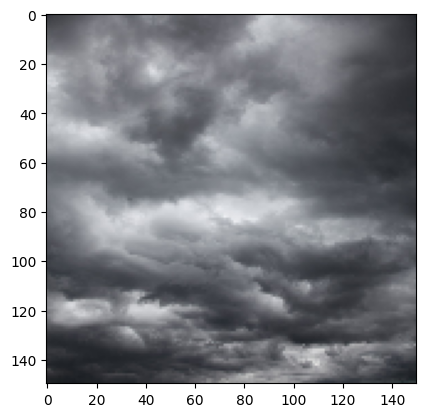

This image is 100.0% cloudy. => D:/Datasets/weather/new_images\cloudy1.jpg


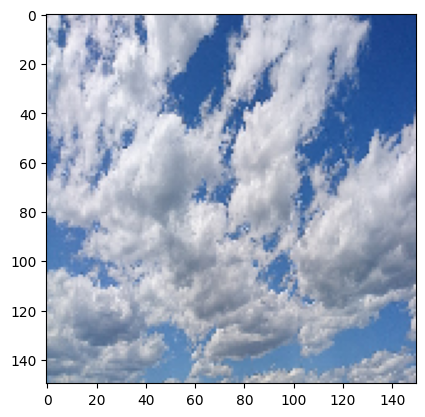

This image is 41.1% rain. => D:/Datasets/weather/new_images\cloud_2.jpg


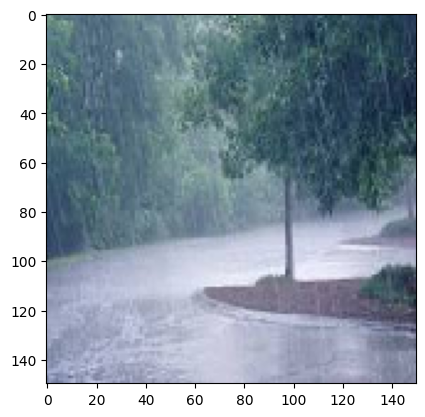

This image is 99.9% rain. => D:/Datasets/weather/new_images\rain_1.jpg


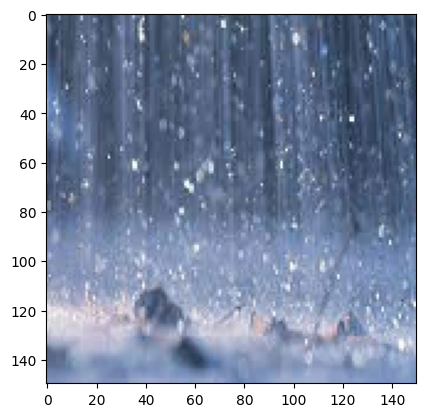

This image is 100.0% rain. => D:/Datasets/weather/new_images\rain_2.jpg


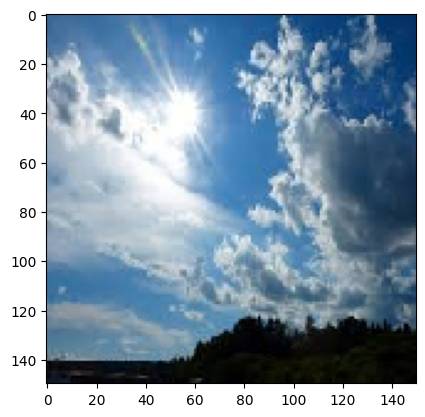

This image is 60.0% cloudy. => D:/Datasets/weather/new_images\shine1.jpg


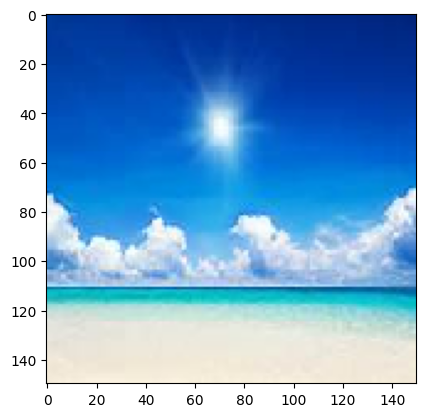

This image is 98.7% shine. => D:/Datasets/weather/new_images\shine2.jpg


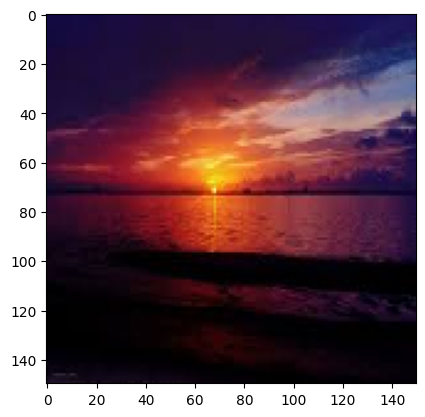

This image is 100.0% sunrise. => D:/Datasets/weather/new_images\sunrise_1.jpg


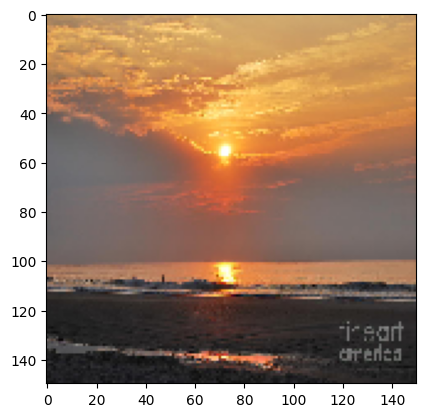

This image is 99.6% sunrise. => D:/Datasets/weather/new_images\sunrise_2.jpg


In [164]:
predict_weather(model_name, fnames, classes_names)

In [165]:
pivot =  pd.pivot_table(predictions_df, index=['File', 'Classe'], columns=['Model'], fill_value='')
pivot

,,Acc (%)
,Model,ResNet50-5_layers
File,Classe,
D:/Datasets/weather/new_images\cloud_2.jpg,rain,41.1
D:/Datasets/weather/new_images\cloudy1.jpg,cloudy,100.0
D:/Datasets/weather/new_images\rain_1.jpg,rain,99.9
D:/Datasets/weather/new_images\rain_2.jpg,rain,100.0
D:/Datasets/weather/new_images\shine1.jpg,cloudy,60.0
D:/Datasets/weather/new_images\shine2.jpg,shine,98.7
D:/Datasets/weather/new_images\sunrise_1.jpg,sunrise,100.0
D:/Datasets/weather/new_images\sunrise_2.jpg,sunrise,99.6
